In [88]:
#####################
from datetime import datetime, timedelta

from scipy import signal
import numpy as np

import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from scipy.io import netcdf

from pylab import *


In [89]:
########################################################################
########################################################################

def find_nearest(array,value):
    idx=(np.abs(array-value)).argmin()
    data=array[idx]
    data1=np.argwhere(array==data)
    data1=data1.ravel()
    return data1


def windows_array(array0,k,intervals,target_value):
    idx=np.arange(len(array0))
    
    # Index selection
    iz=(idx>k-intervals) & (idx<k+intervals)
    
    iz1=(idx*iz).astype('float')
    iz1[iz1==0]=np.nan                                                    # turn zero to nan
    
    # Open windows of value
    array1=(array0*iz).astype('float')
    array1[array1==0]=np.nan
    array1=np.ma.masked_invalid(array1)
    
    # Apply the function to find closest value in the transformed array0
    data=find_nearest(array1,target_value)
    
    # Define closest index to K
    indk=find_nearest(data,k)
    final_indx=data[indk]

    # Series of results
    final_value=array0[final_indx]
    
    return final_indx,final_value
########################################################################
########################################################################
########################################################################
########## La fonction qui interpole et evite les NaN ##################
########################################################################

def interpid22(sal0,z,resolution):

    znew=np.linspace(z[0],z[-1],resolution)                                # Je construit le nouveau Z (de 42 a 5350)
    znew=np.interp(znew,z,z)
    
    nani=sum(~np.isnan(sal0))                                            # Detect les donnees valides sans NaN
    
    if nani==len(z):                                                    # Si tout la colonne n'a pas de NaN
        cs=CubicSpline(z,sal0)
        datax=cs(znew)
    
    else:                                                                # Si la colonne a du NaN: interpolation partielle
        idx1,=np.where(znew<=z[nani])
        znew1=znew[:idx1[-1]]
        
        cs=CubicSpline(z[:nani],sal0[:nani])
        datax=cs(znew1)
    
    return datax,znew


########################################################################
########################################################################
####################### Hydrographic Data sets #########################
########################################################################
############################# Area #####################################


In [90]:
pname='./'
fname='2007.nc000000.nc'

####

minlon,maxlon,minlat,maxlat=[-60.,30.,-45.,0.]

######################

nc=netcdf.netcdf_file(pname+fname)

lat=nc.variables['lat'][:]
lon=nc.variables['lon'][:]
ilat,=np.where((lat>=minlat)&(lat<=maxlat))
ilon,=np.where((lon>=minlon)&(lon<=maxlon))
lon=lon[ilon[0]:ilon[-1]+1]
lat=lat[ilat[0]:ilat[-1]+1]

z=nc.variables['z'][:]
sigma1=np.array(nc.variables['sigma0'][0,:,ilat[0]:ilat[-1]+1,ilon[0]:ilon[-1]+1])

nc.close()

######################

fname='2007.nc000001.nc'

nc=netcdf.netcdf_file(pname+fname)
sigma2=np.array(nc.variables['sigma0'][0,:,ilat[0]:ilat[-1]+1,ilon[0]:ilon[-1]+1])

nc.close()

In [91]:

#######

def grad(profile,z):
    return (profile[1:] - profile[:-1]) / (z[1:] - z[:-1])

def restratify(profile,z,interpolation=False):
    eps = 0.01; sigma_max = 0.
    ik = np.nanargmin(np.isfinite(profile))
    
    if ik>0: ik -= 1
    else: ik=len(profile)-1
    
    profile_tmp  = copy(profile)
    
    for iz in range(ik):
        sigma_max = np.nanmax([profile_tmp[iz],sigma_max])
        if profile_tmp[iz+1]<=sigma_max: profile_tmp[iz+1]=np.nan
    
    if interpolation:
        
        if not np.isfinite(profile_tmp[ik]):
            profile_tmp[ik]=np.nanmax(profile_tmp) + eps

        good = np.where(np.isfinite(profile_tmp))
        my_interp = interp.interp1d(z[good], profile_tmp[good],bounds_error=False,fill_value="extrapolate")
        profile_tmp[:ik] = np.where(np.isfinite(profile_tmp[:ik]),profile_tmp[:ik],my_interp(z[:ik]))
        
    return profile_tmp

####


0 0


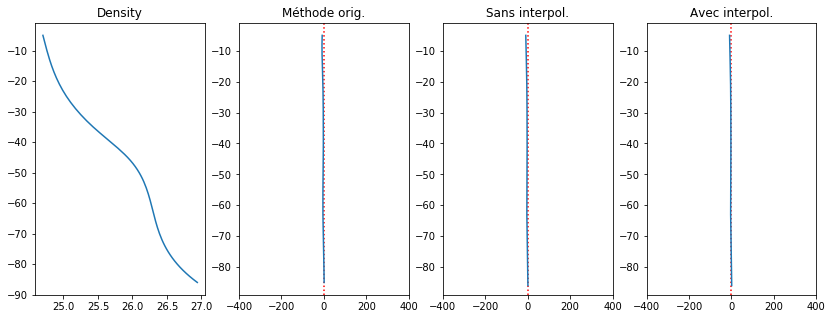

0 5


<timed exec>:20: RuntimeWarning: divide by zero encountered in true_divide


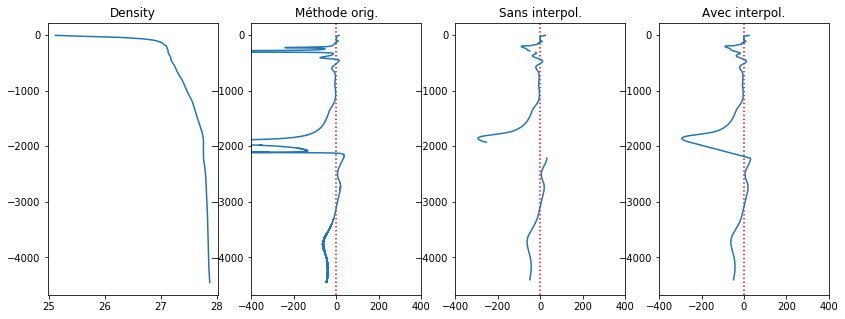

0 10


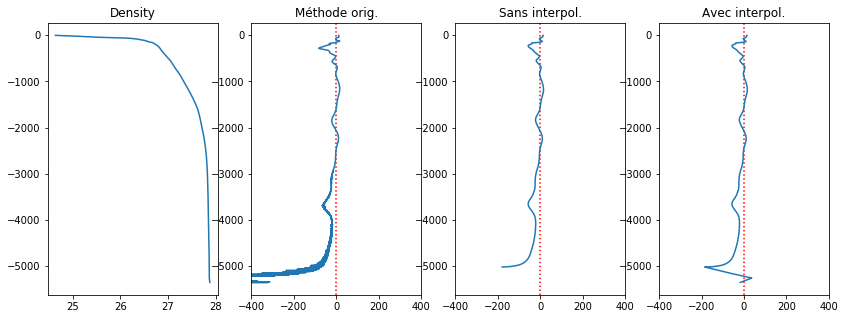

0 15


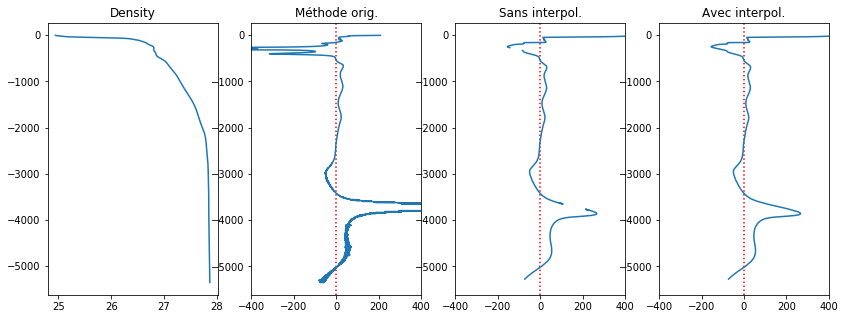

0 20


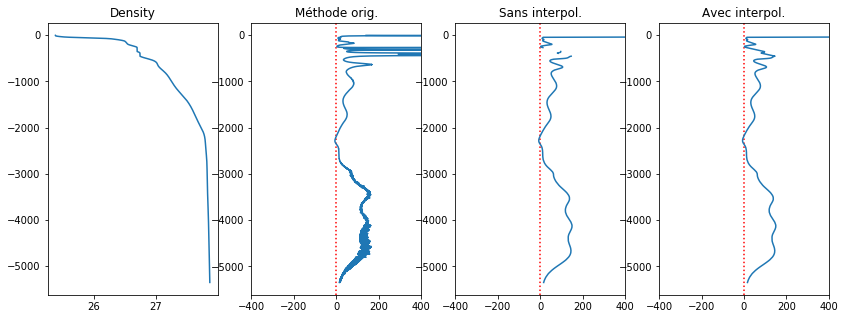

0 25


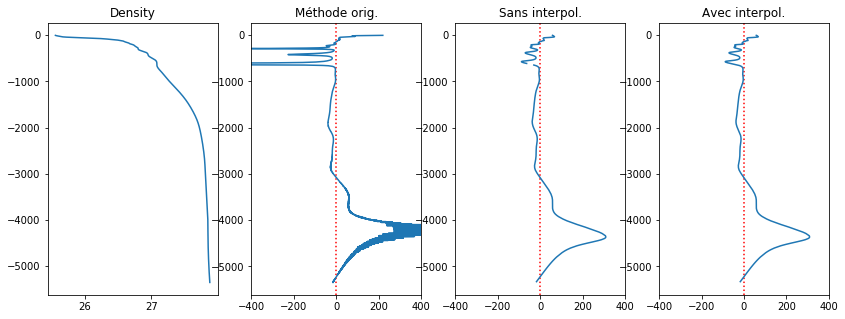

0 30


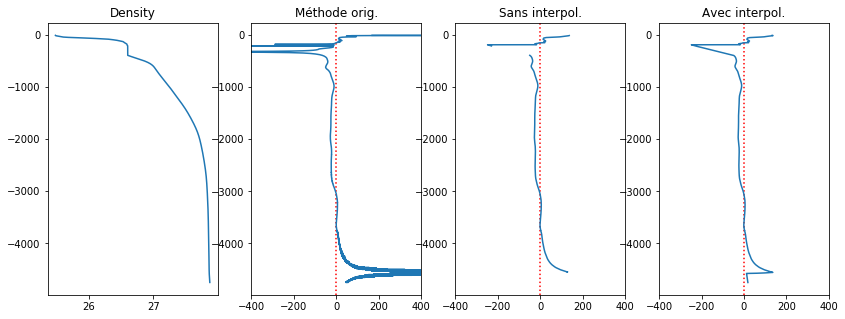

0 35


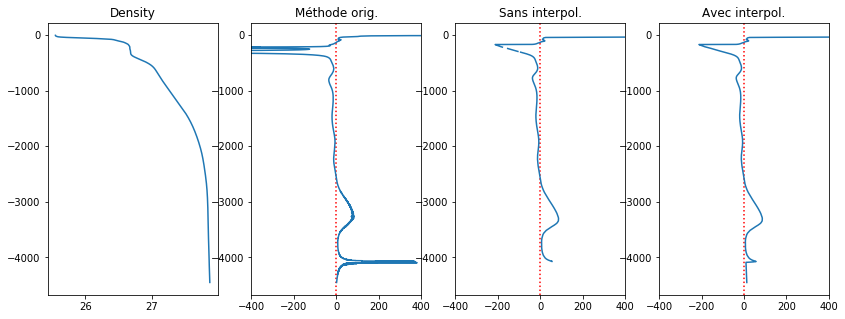

0 40


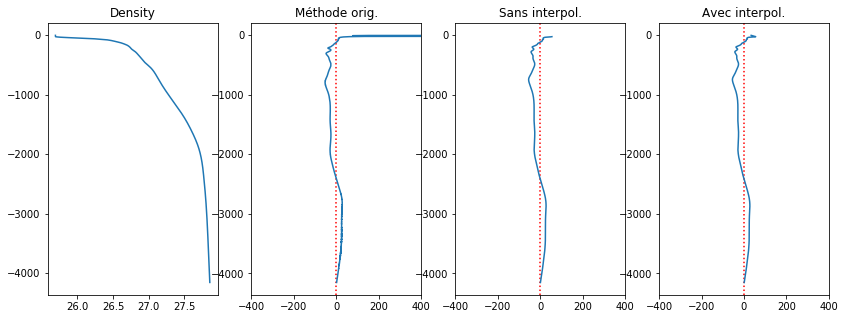

0 45


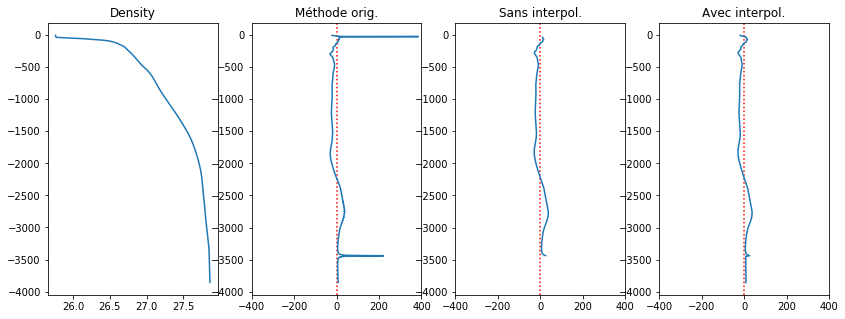

0 50


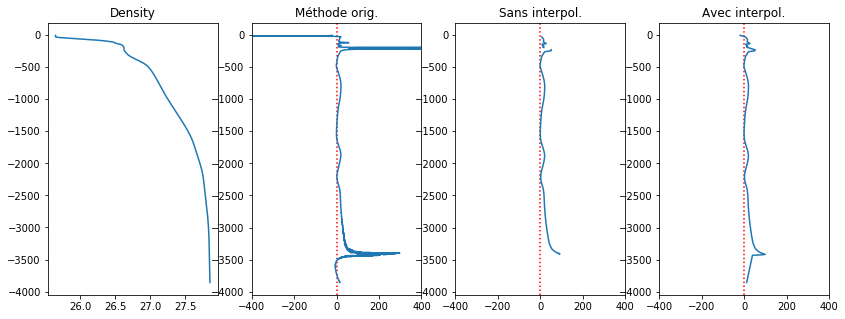

0 55


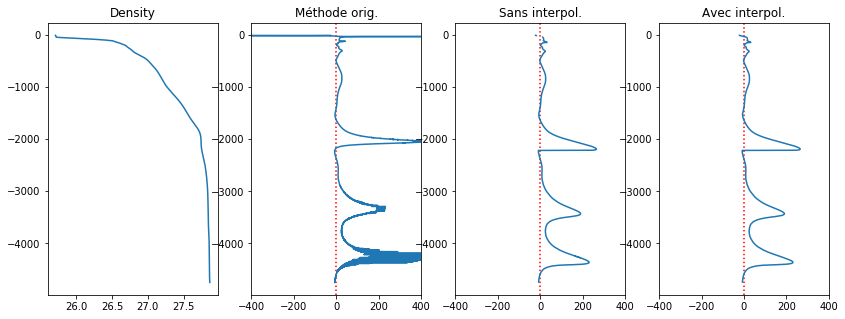

0 60


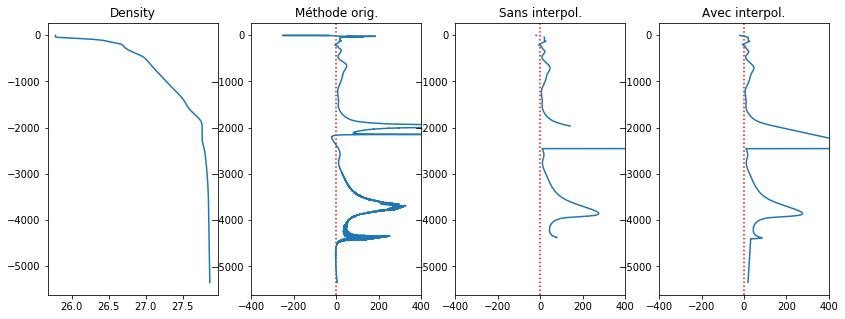

0 65


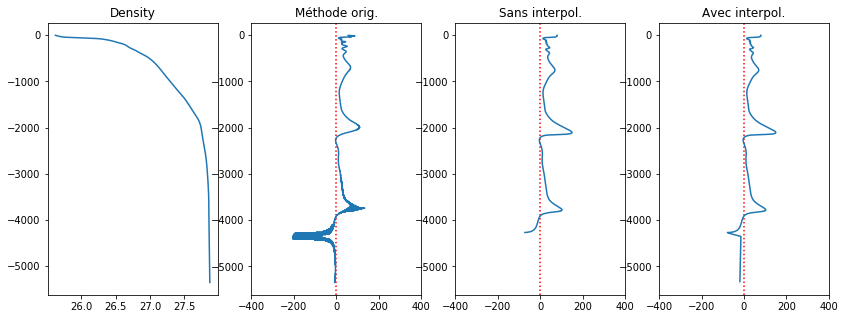

0 70


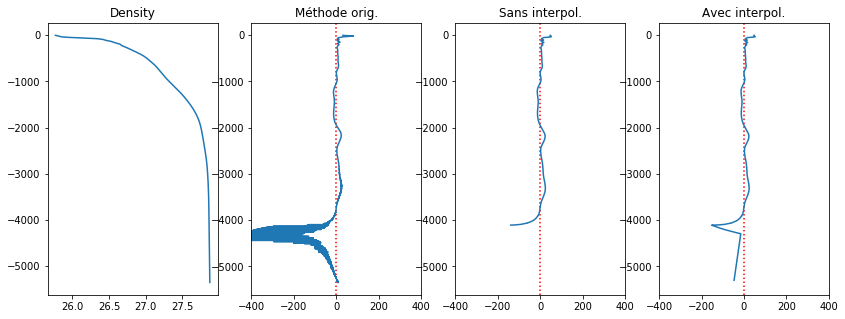

0 75


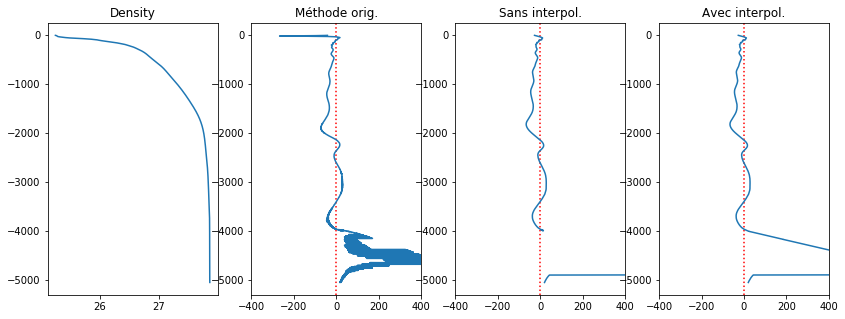

0 80


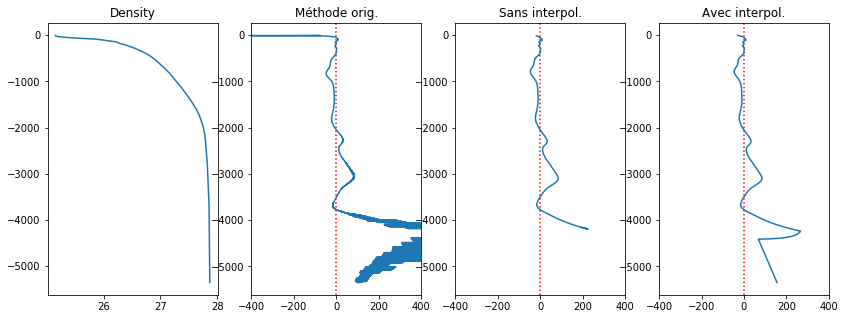

0 85


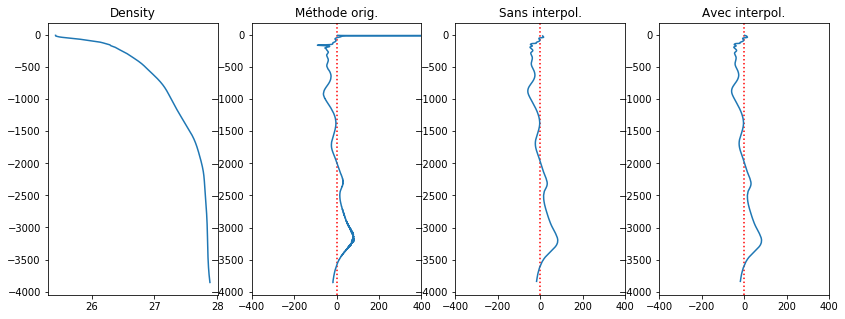

0 90


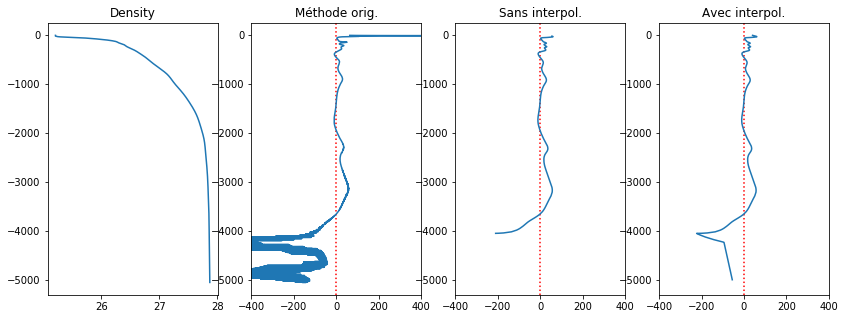

5 0
5 5


<timed exec>:16: RuntimeWarning: All-NaN slice encountered


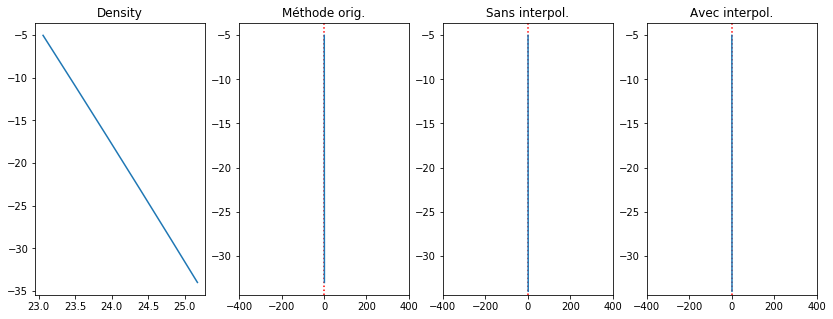

5 10


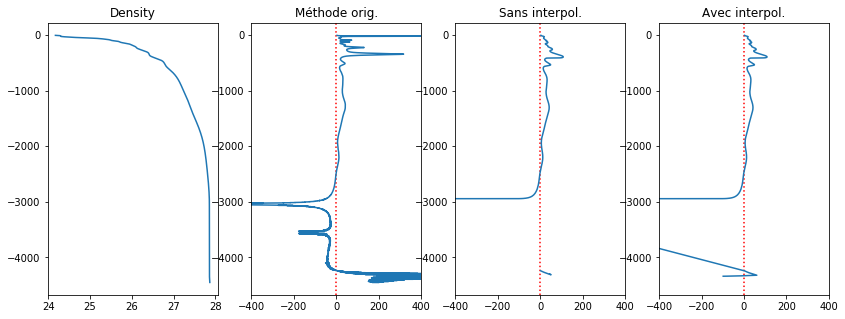

5 15


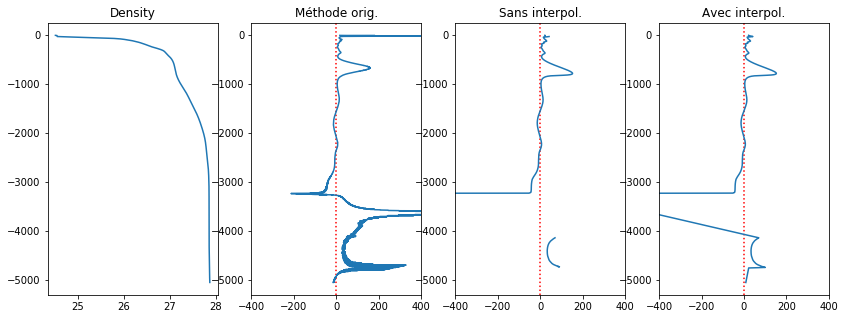

5 20


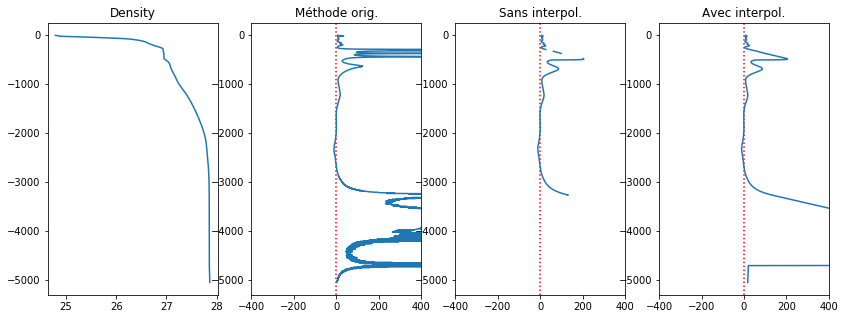

5 25


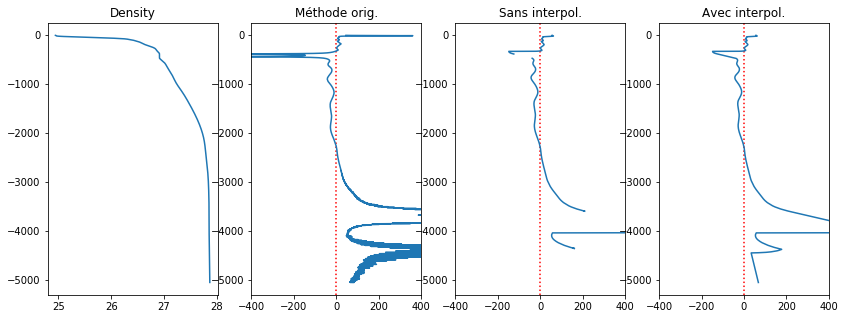

5 30


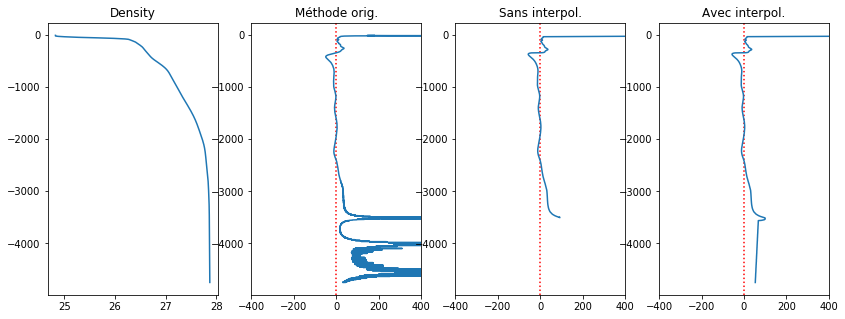

5 35


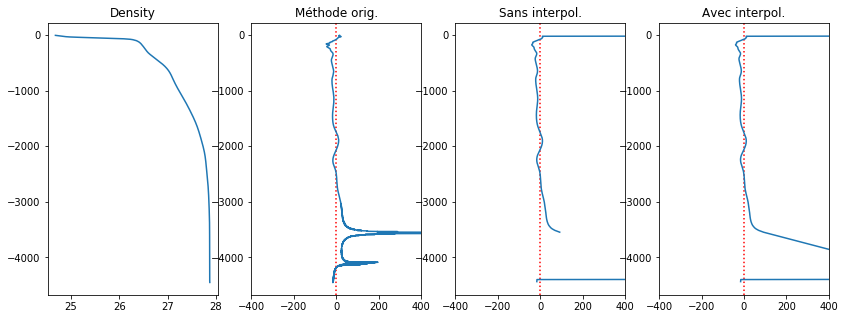

5 40


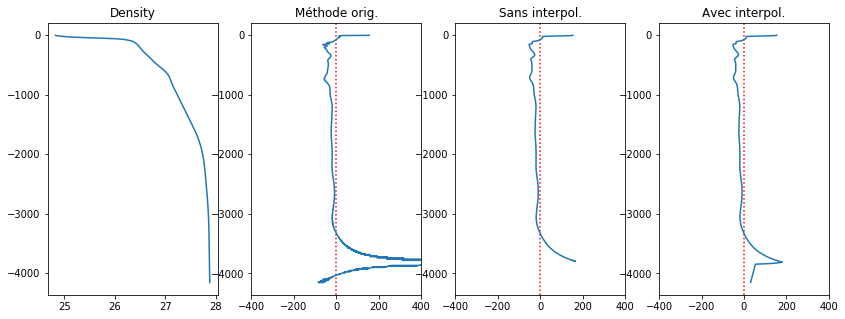

5 45


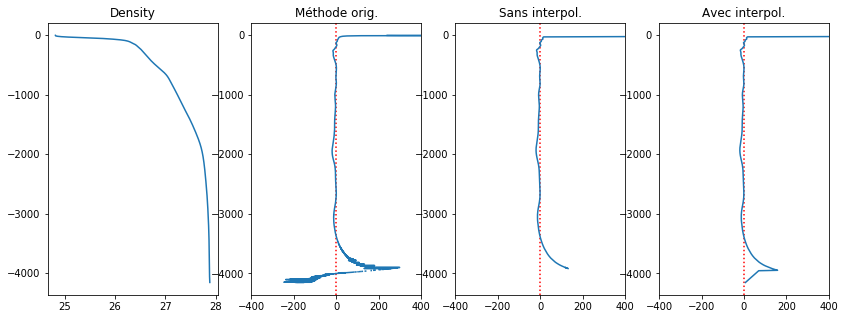

5 50


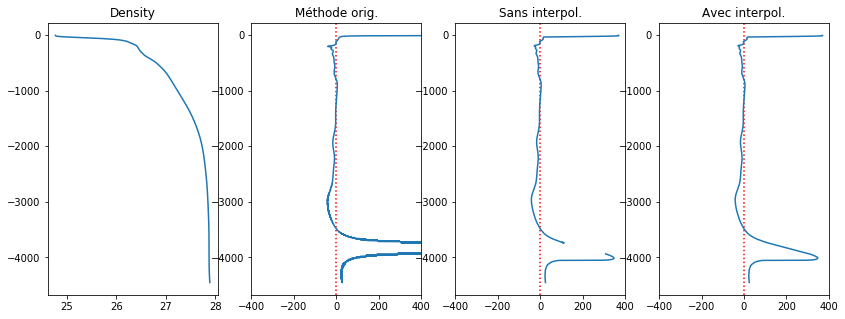

5 55


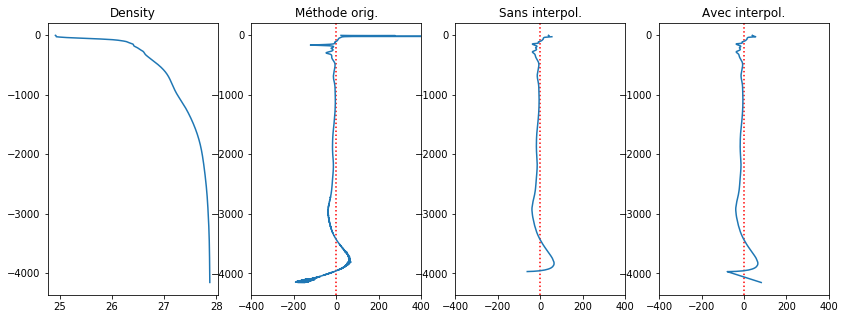

5 60


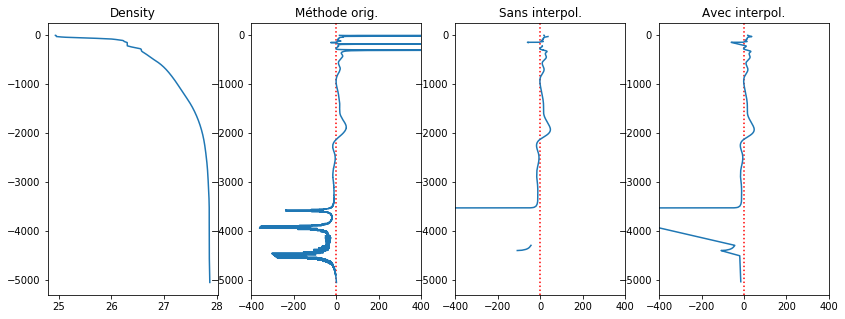

5 65


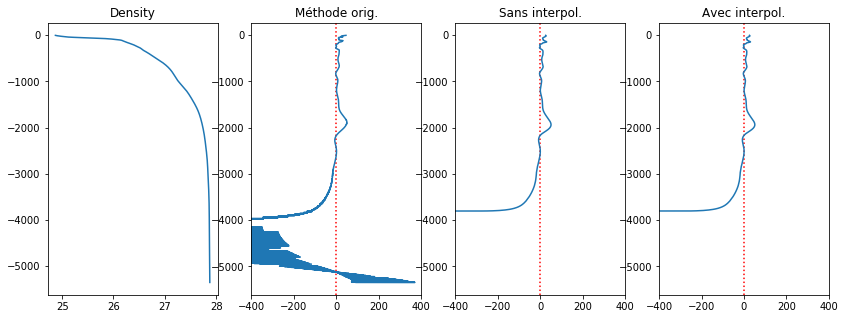

5 70


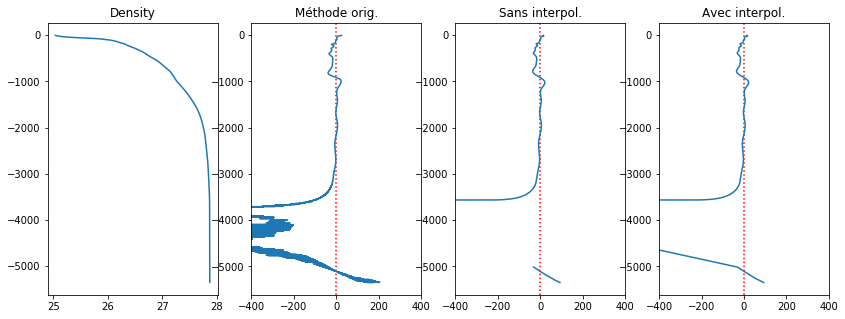

5 75


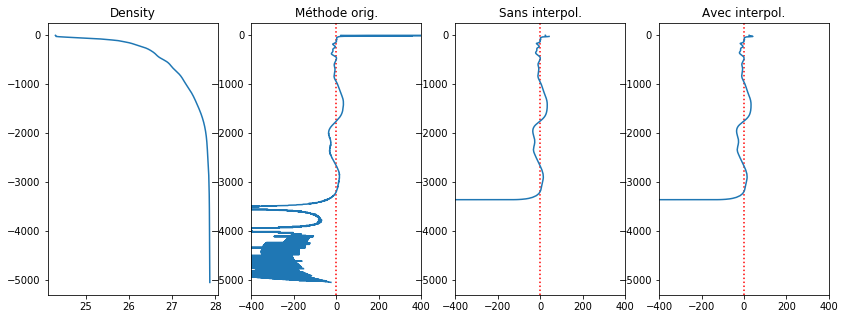

5 80


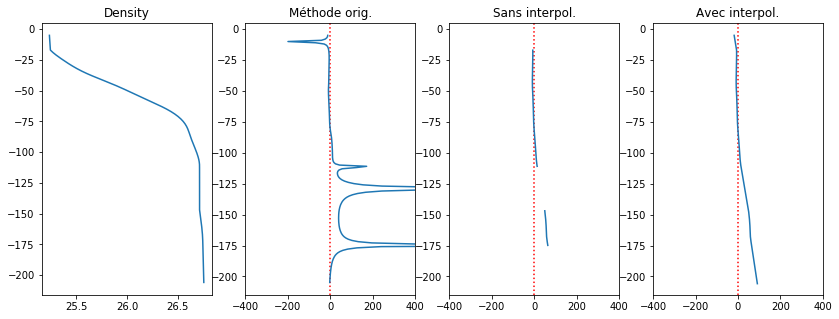

5 85


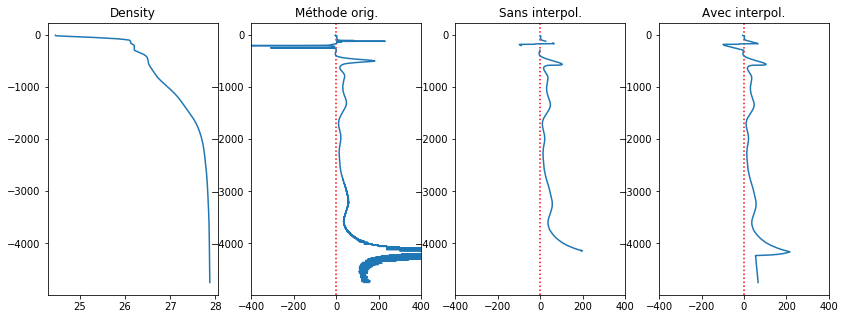

5 90


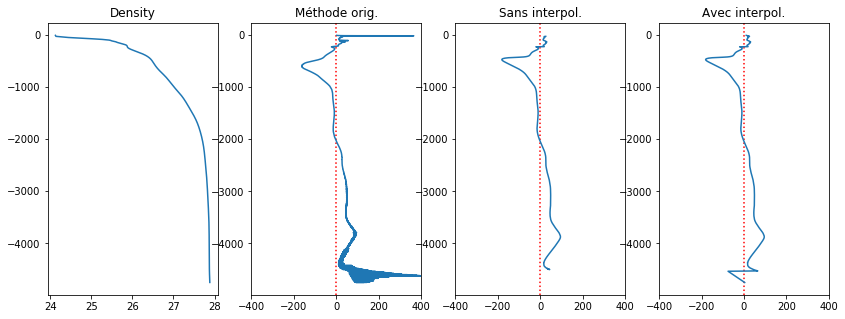

10 0
10 5
10 10


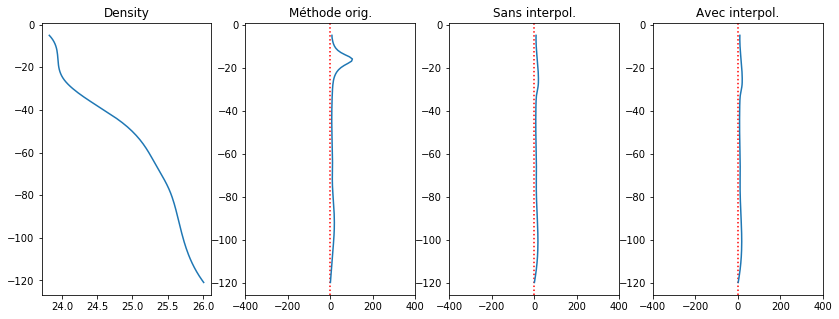

10 15


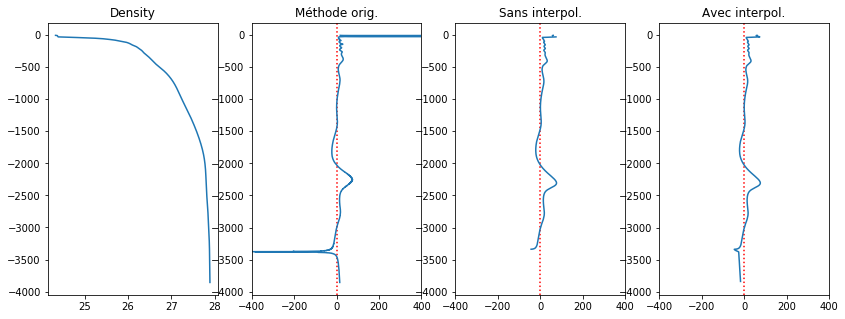

10 20


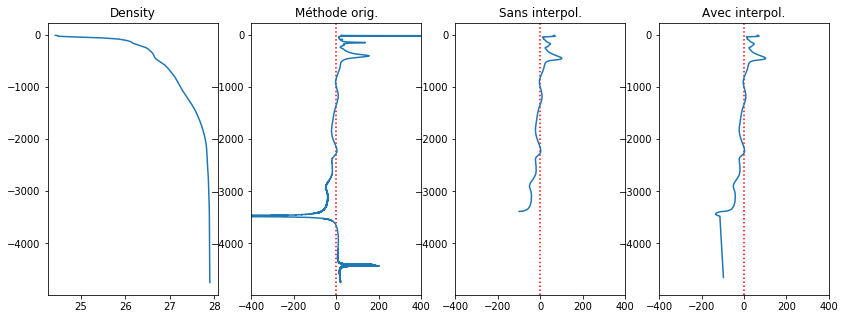

10 25


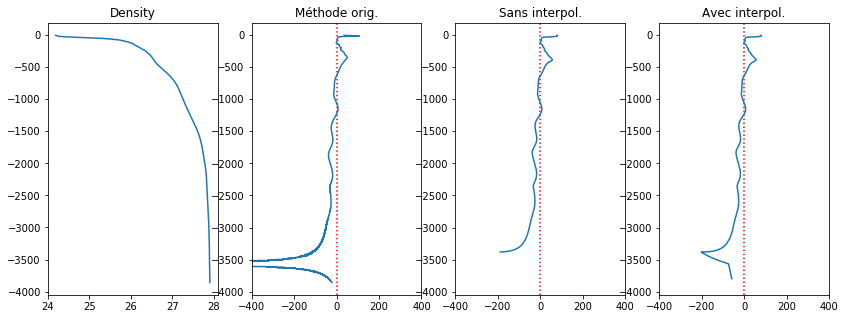

10 30


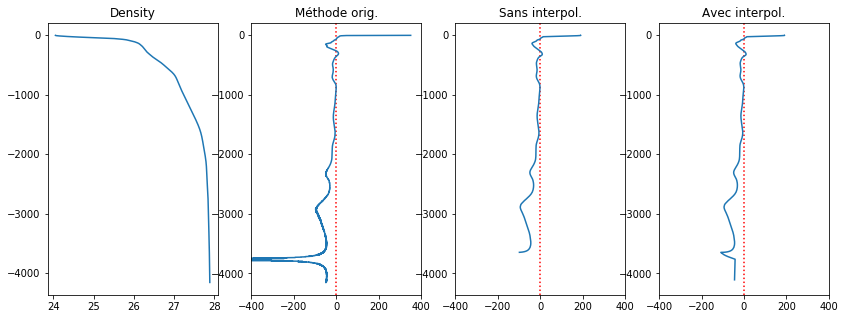

10 35


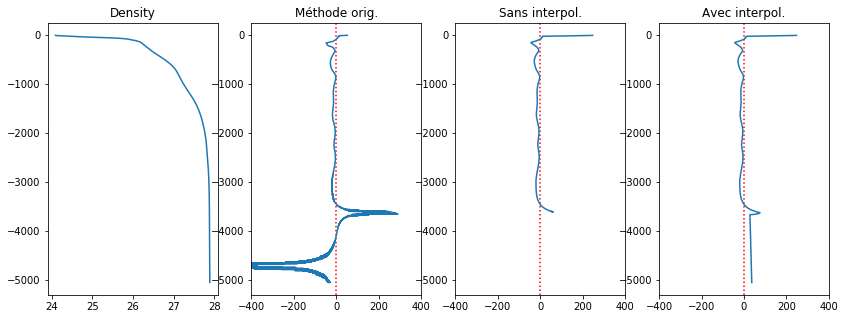

10 40


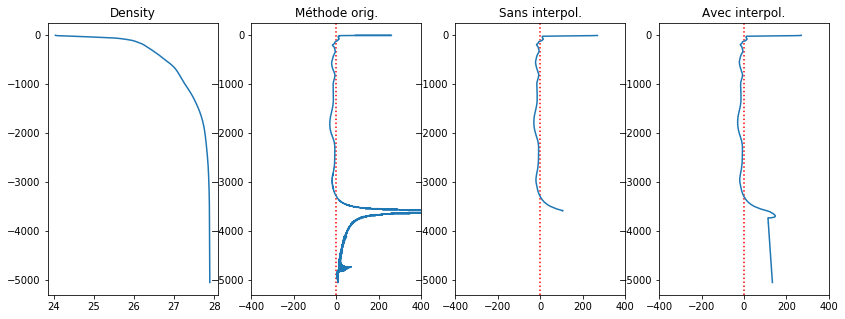

10 45


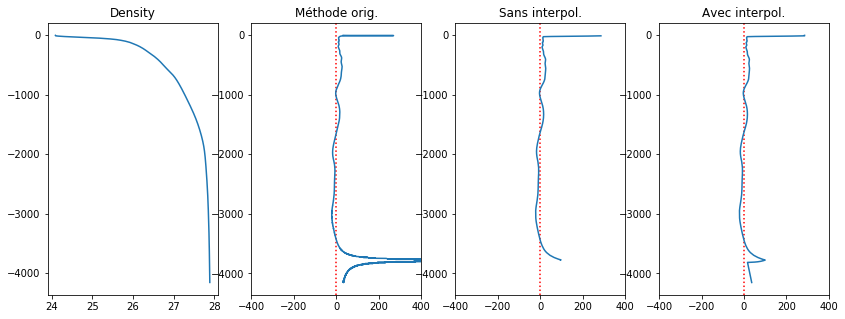

10 50


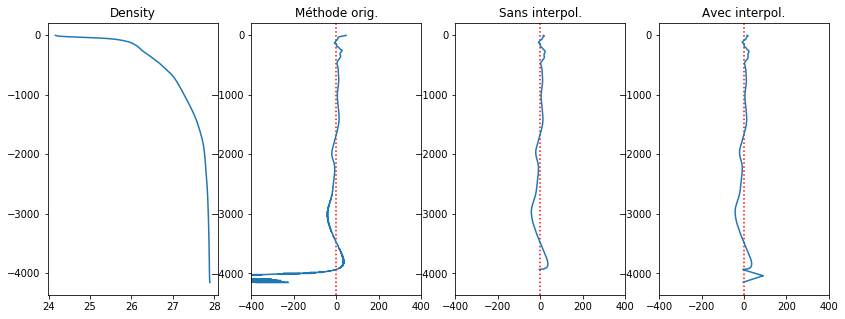

10 55


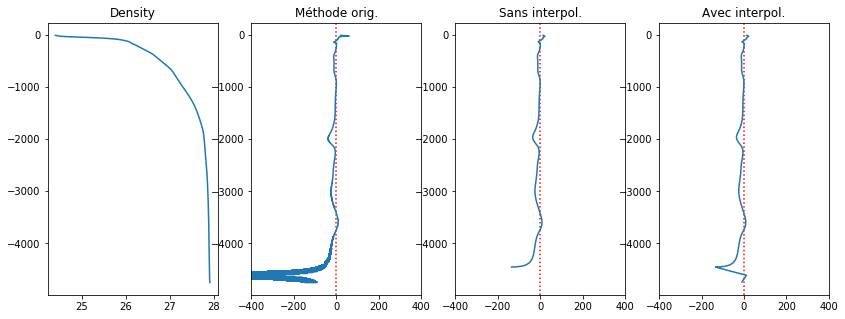

10 60


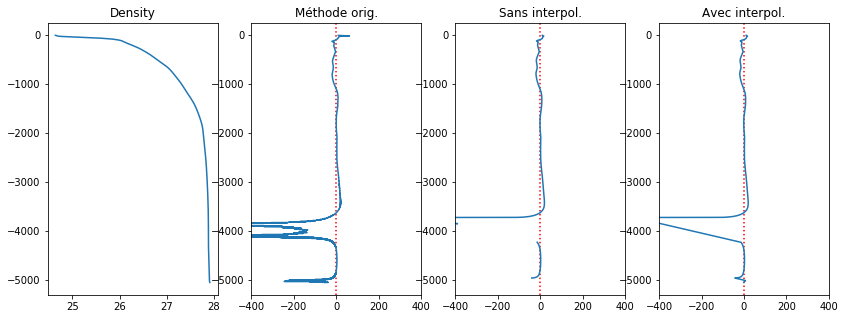

10 65


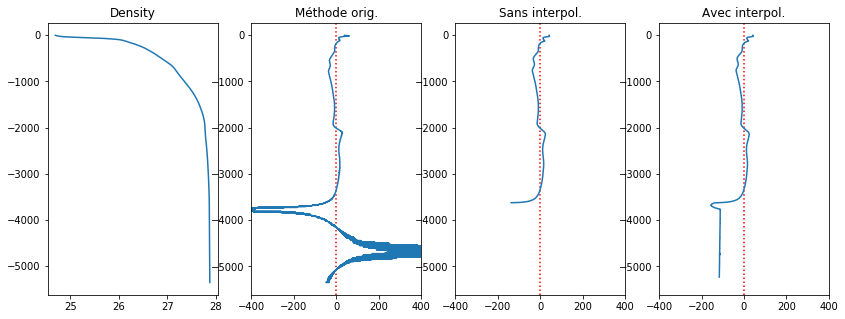

10 70


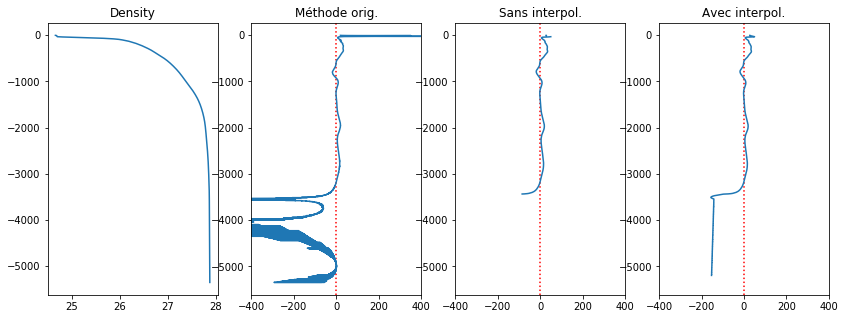

10 75


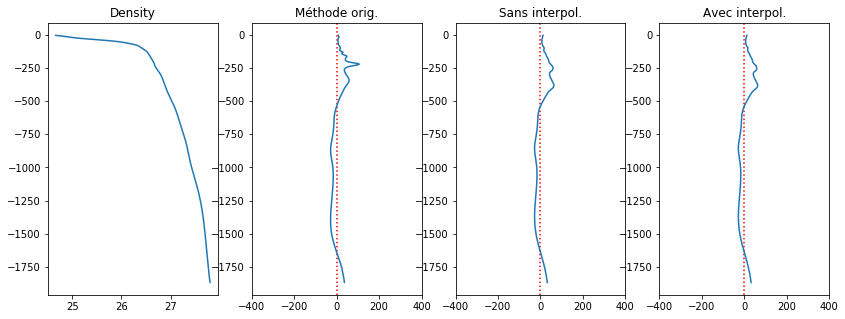

10 80
10 85
10 90
15 0
15 5
15 10
15 15


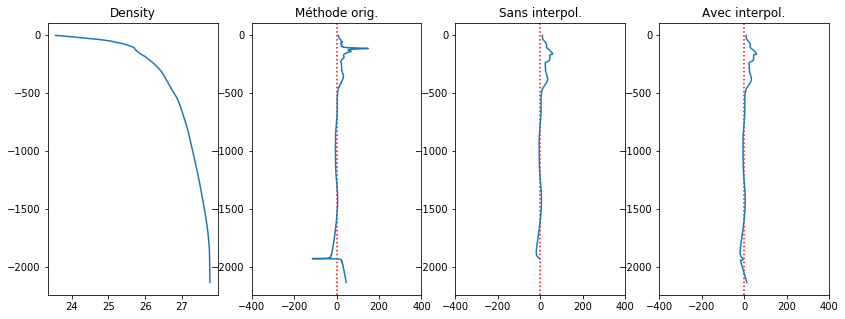

15 20


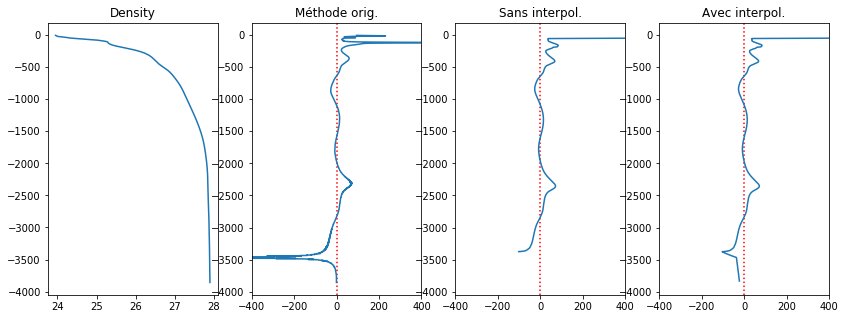

15 25


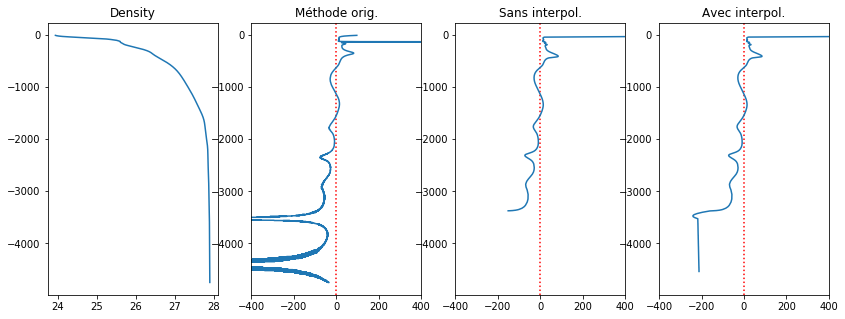

15 30


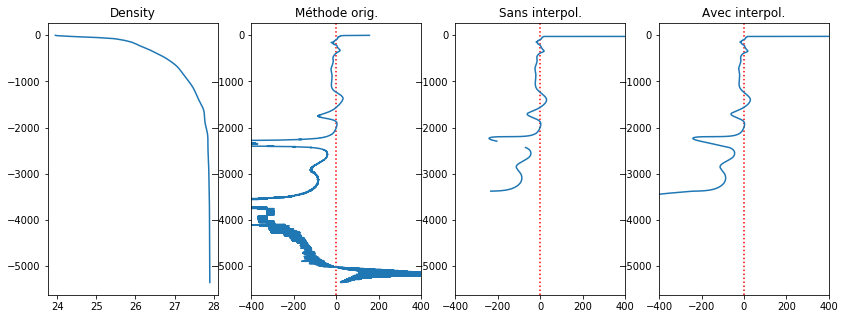

15 35


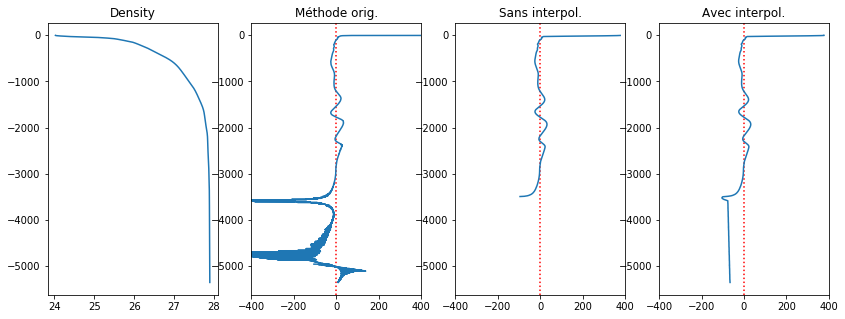

15 40


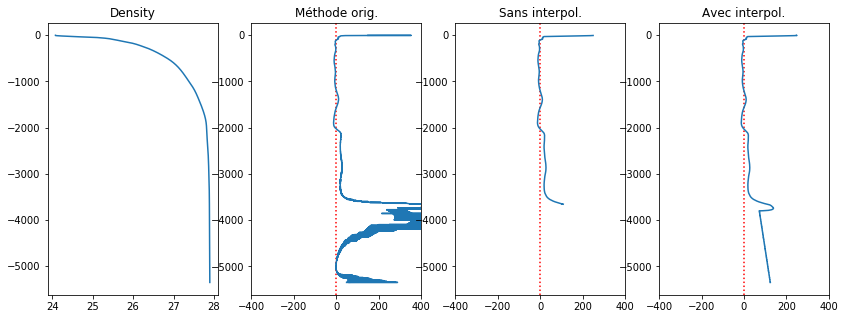

15 45


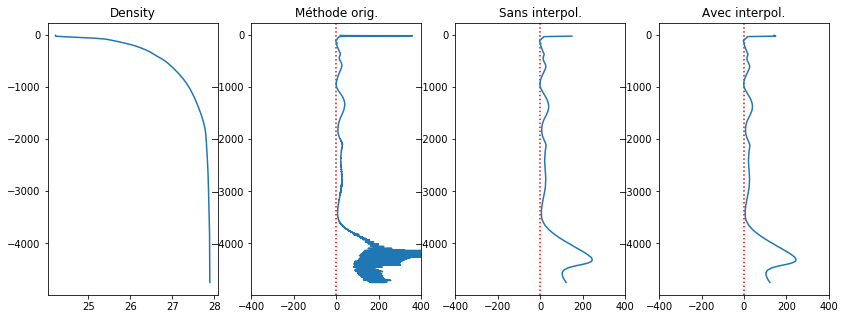

15 50


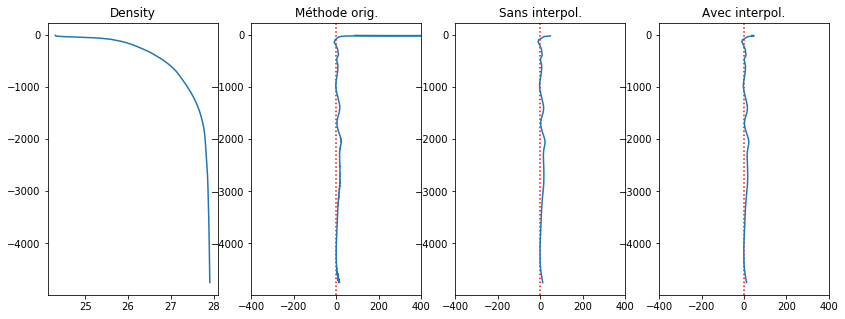

15 55


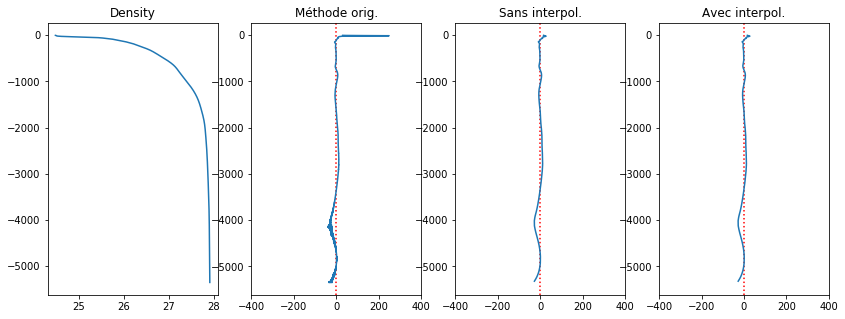

15 60


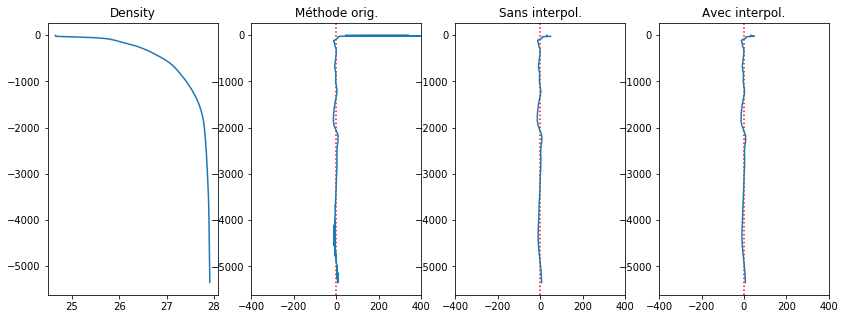

15 65


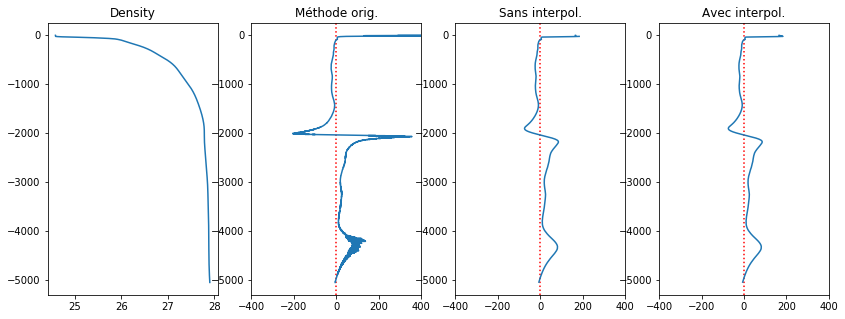

15 70


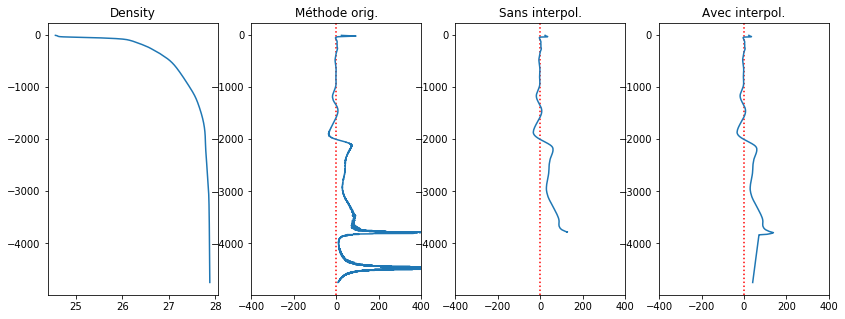

15 75


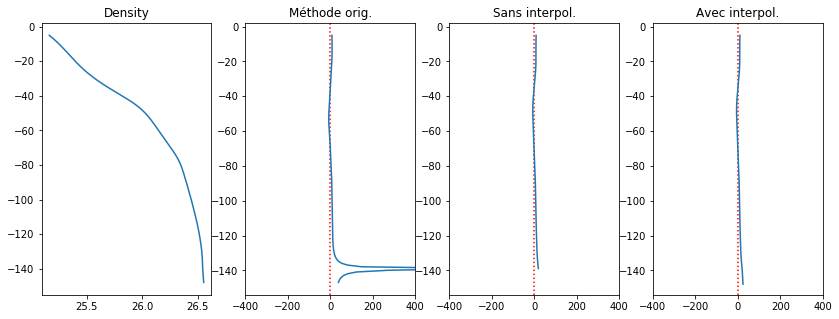

15 80
15 85
15 90
20 0
20 5
20 10
20 15
20 20


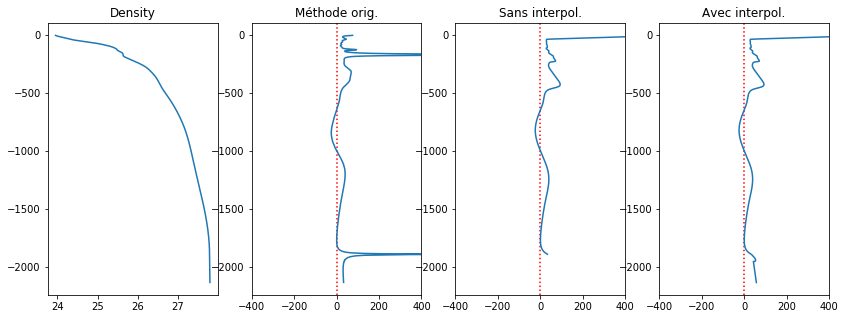

20 25


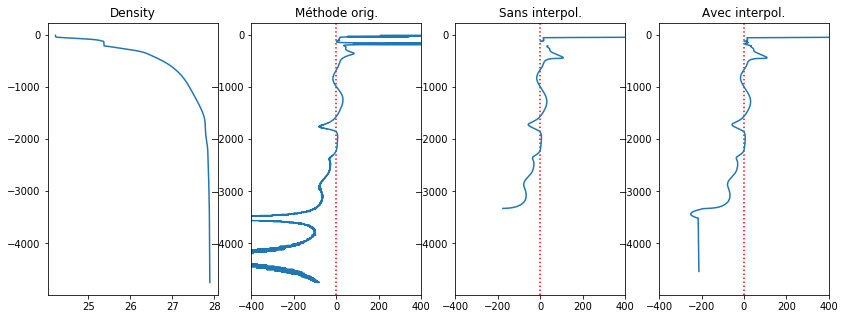

20 30


<timed exec>:20: RuntimeWarning: invalid value encountered in true_divide


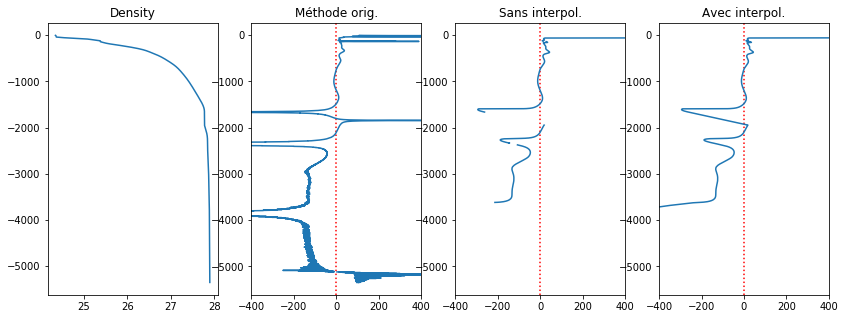

20 35


20 40


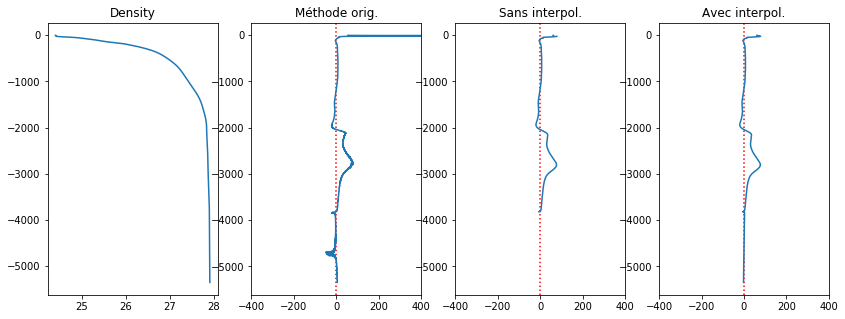

20 45


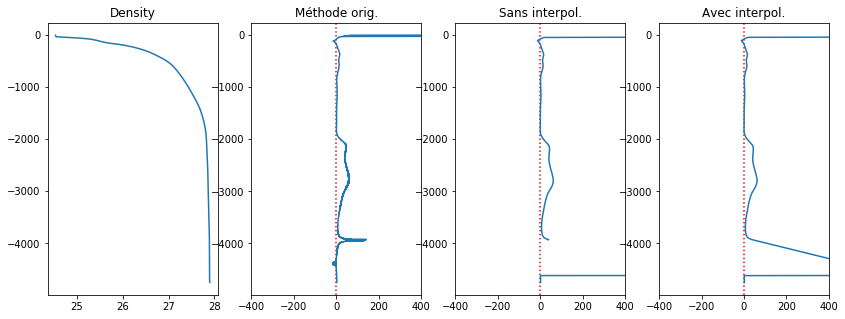

20 50


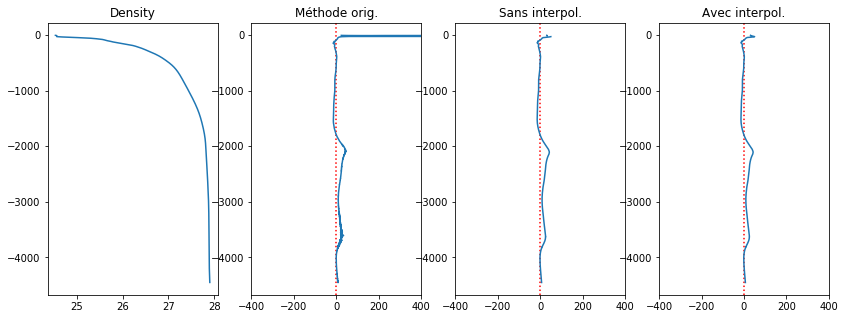

20 55


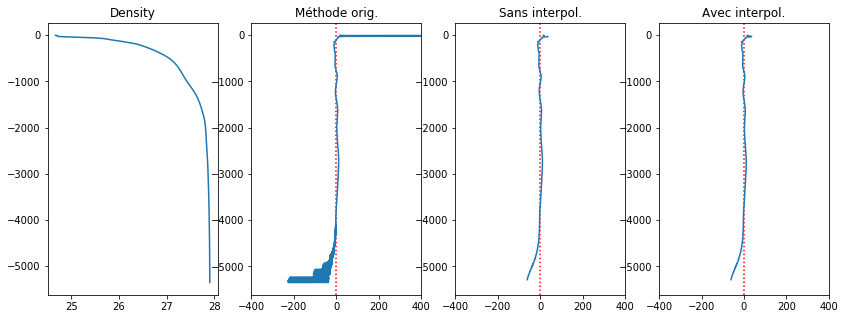

20 60


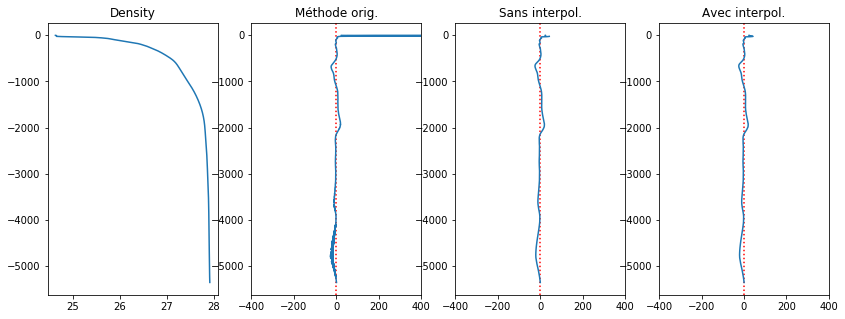

20 65


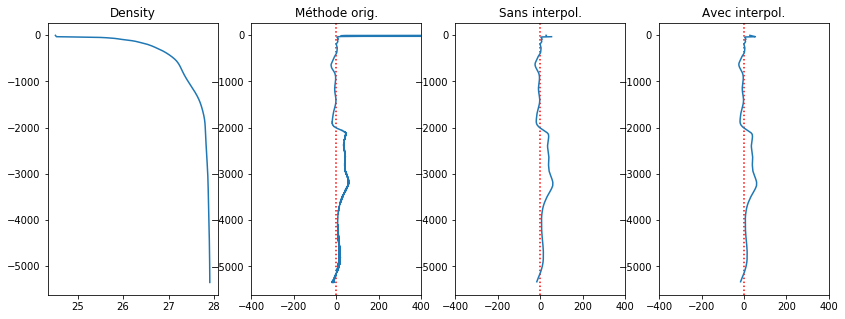

20 70


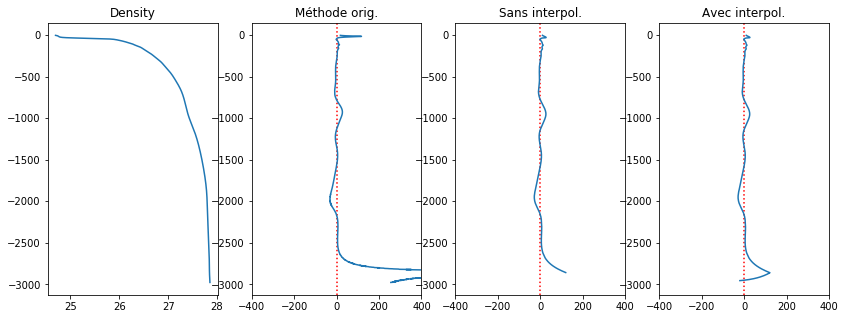

20 75
20 80
20 85
20 90
25 0
25 5
25 10
25 15
25 20
25 25


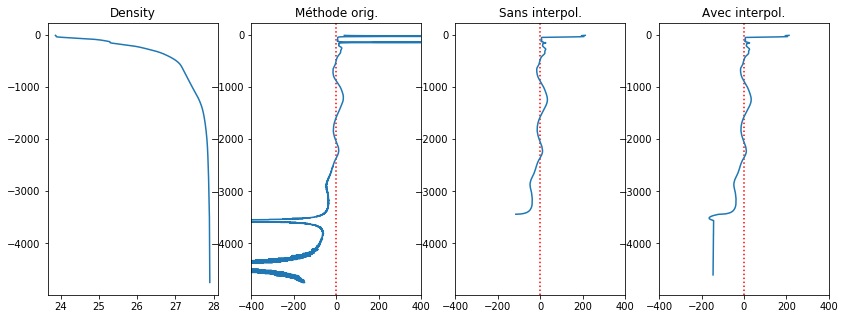

25 30


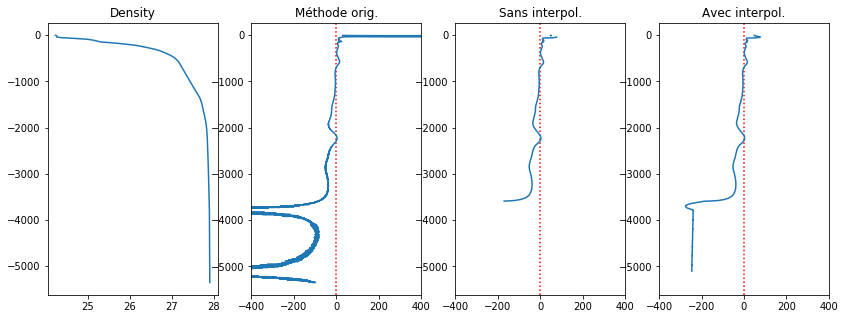

25 35


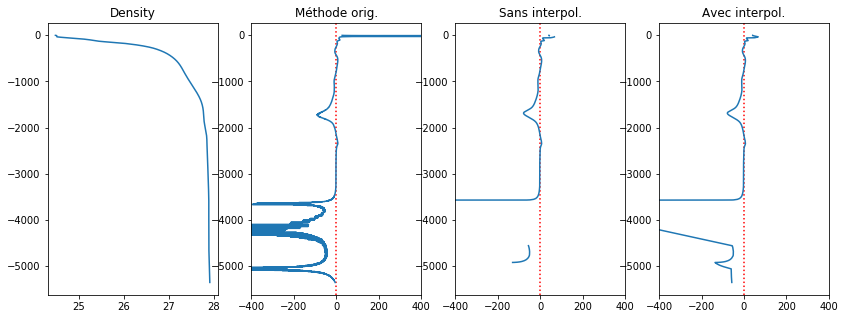

25 40


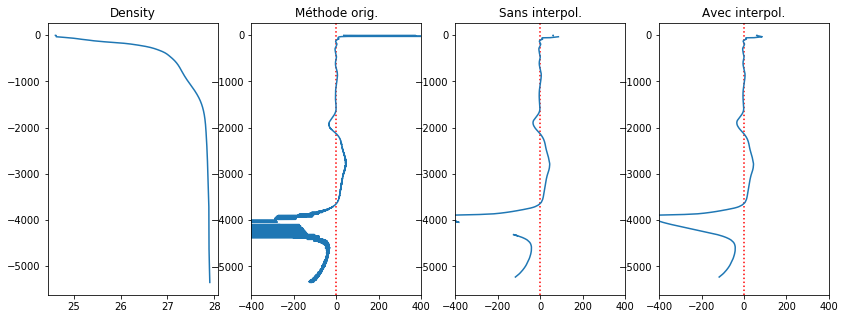

25 45


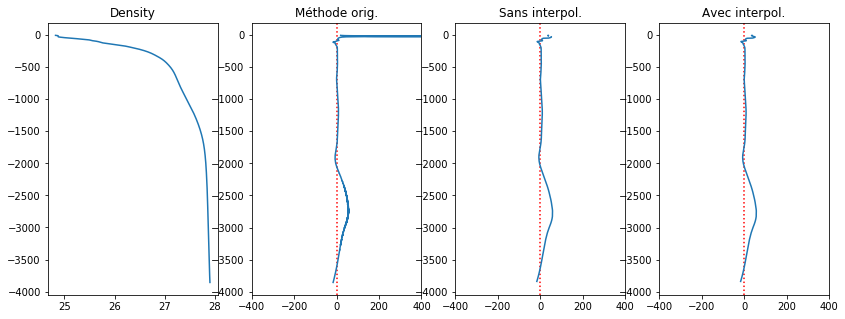

25 50


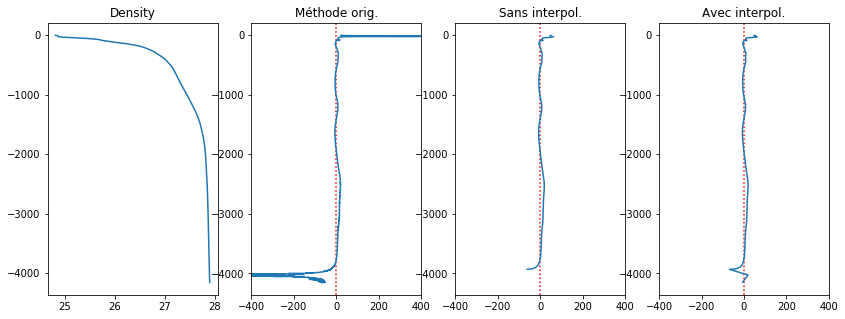

25 55


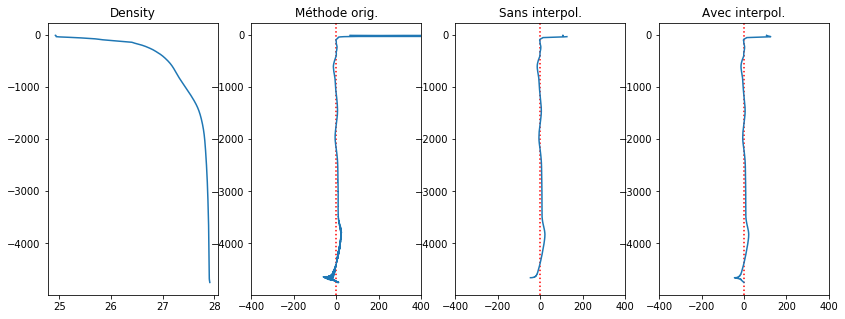

25 60


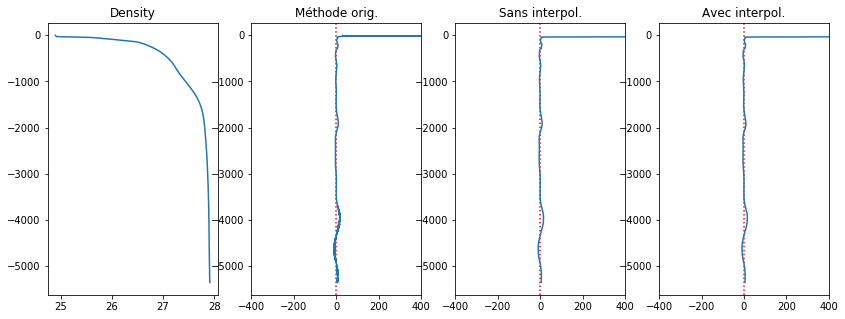

25 65


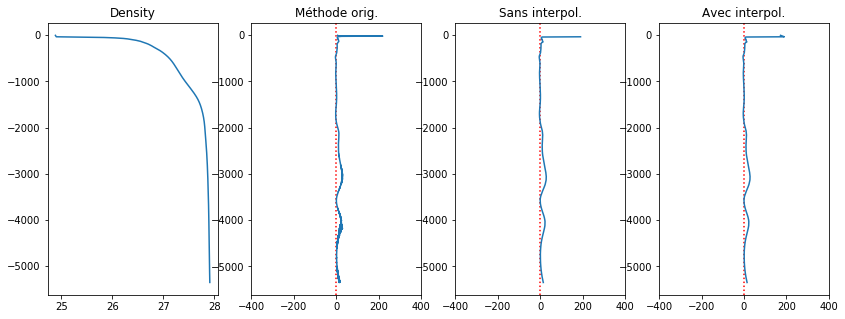

25 70


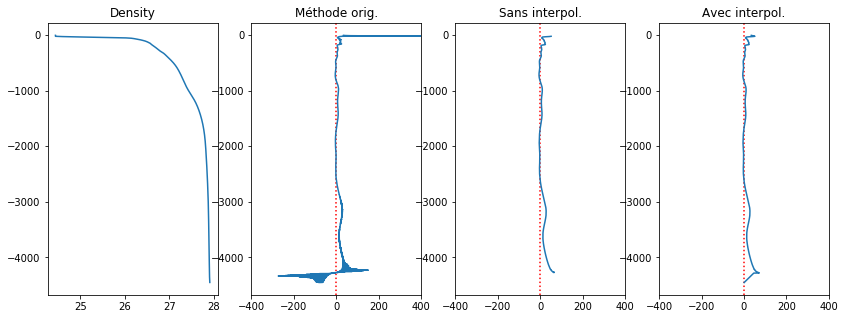

25 75
25 80
25 85
25 90
30 0
30 5
30 10
30 15
30 20
30 25


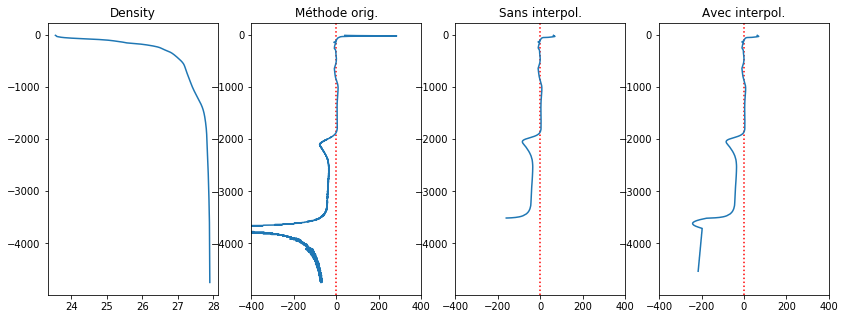

30 30


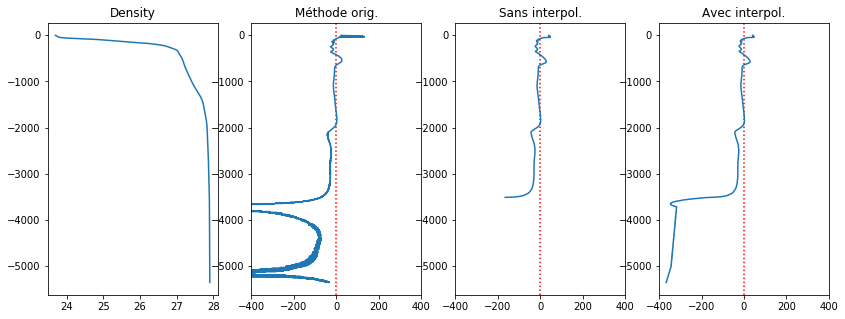

30 35


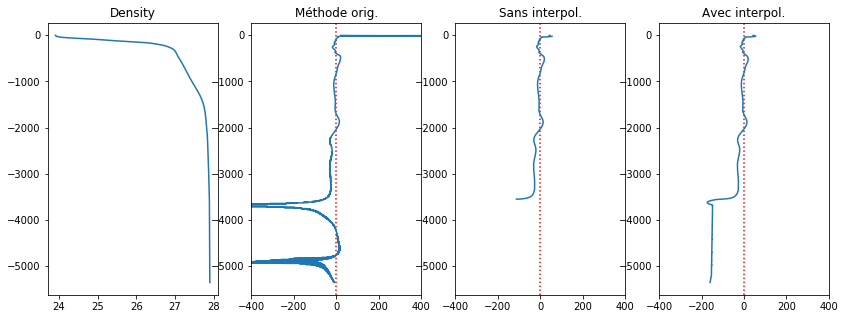

30 40


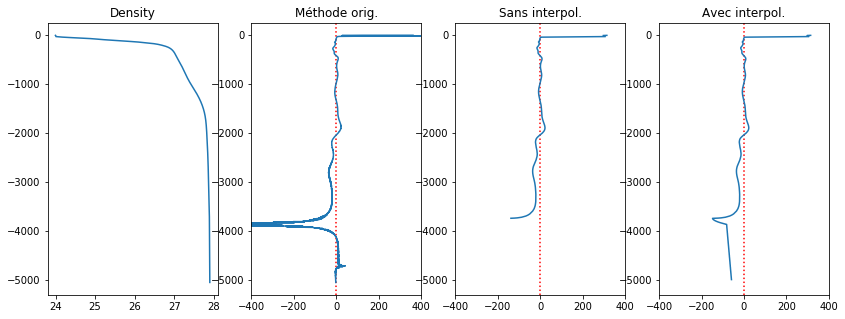

30 45


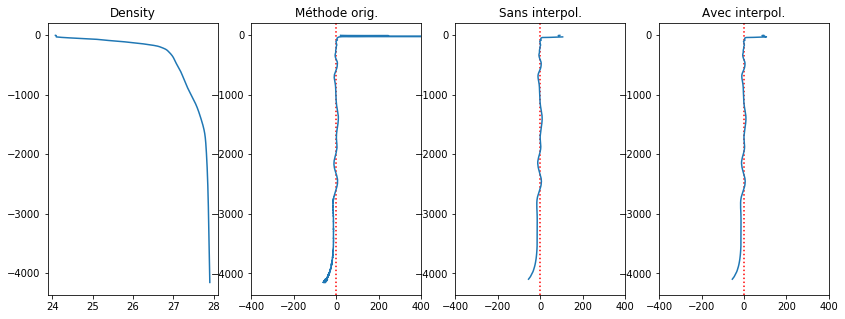

30 50


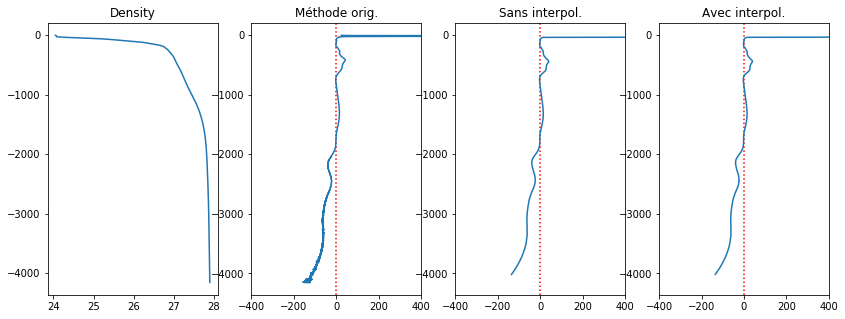

30 55


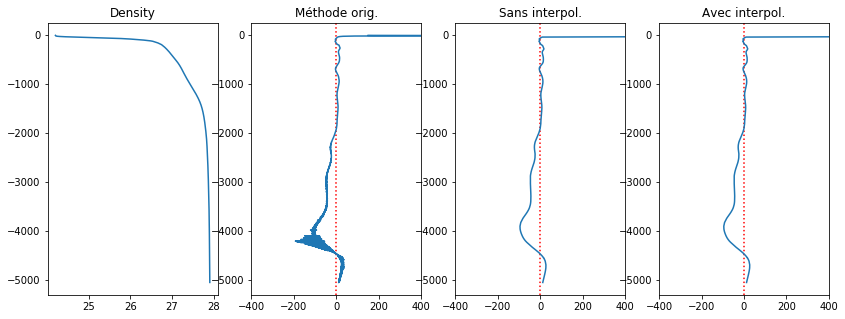

30 60


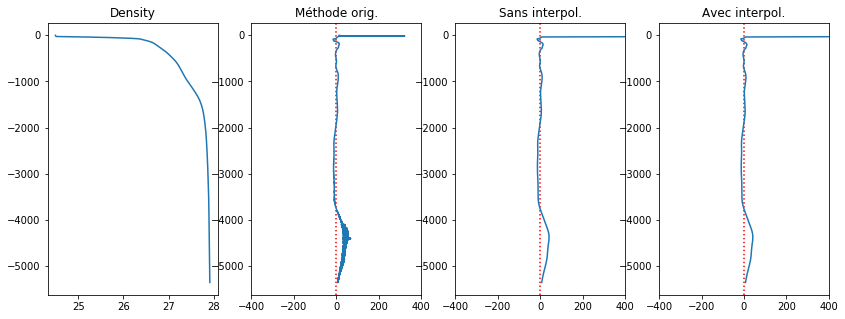

30 65


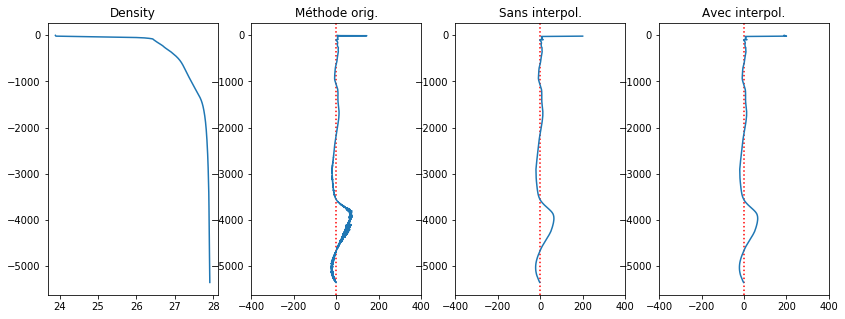

30 70


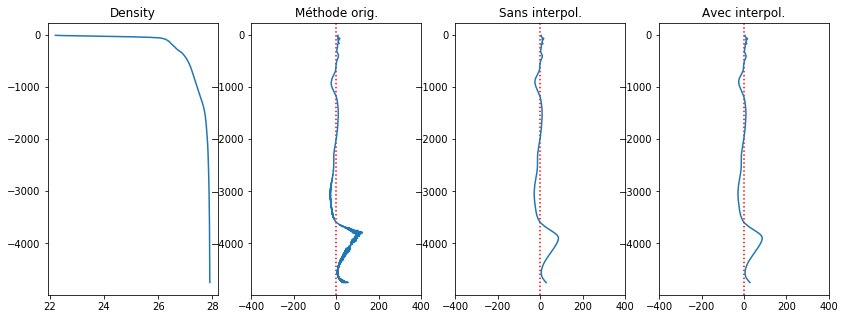

30 75
30 80
30 85
30 90
35 0
35 5
35 10
35 15
35 20
35 25


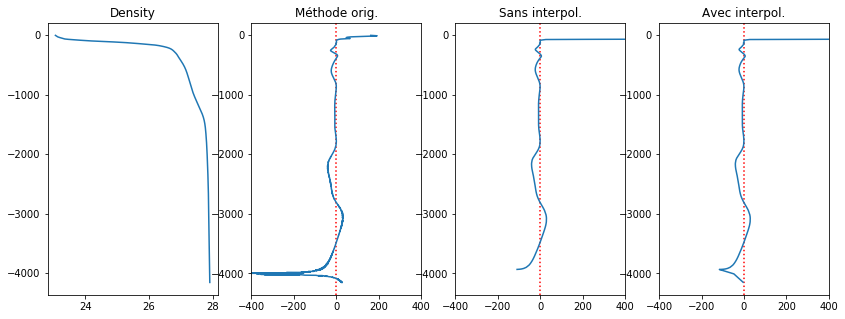

35 30


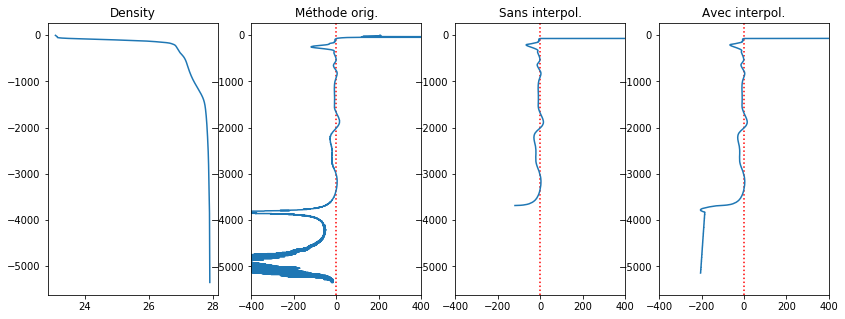

35 35


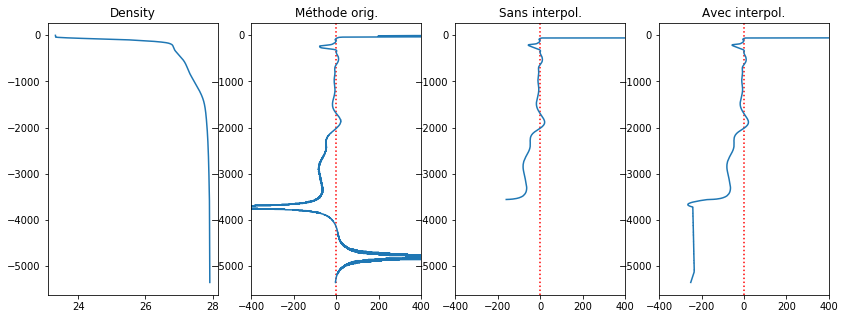

35 40


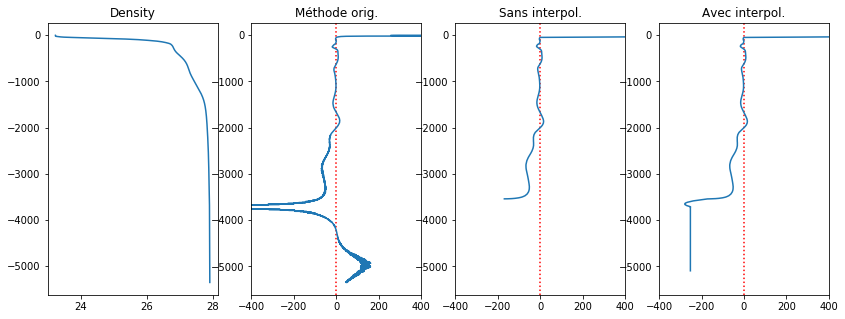

35 45


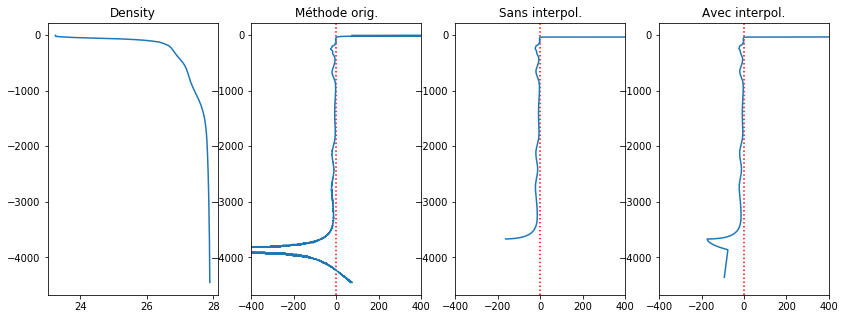

35 50


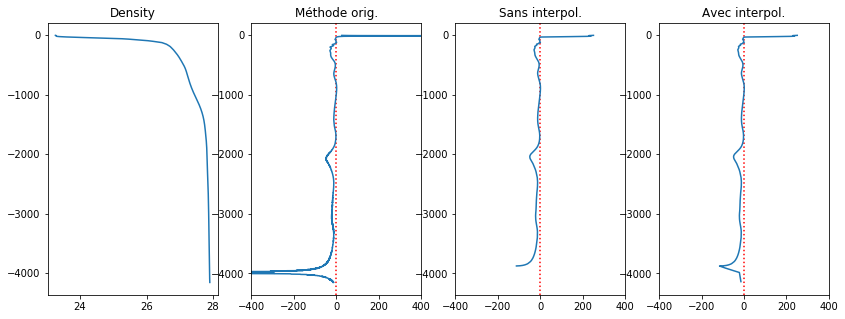

35 55


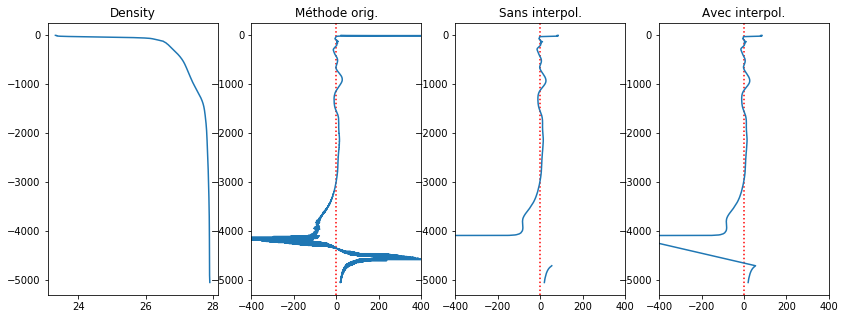

35 60


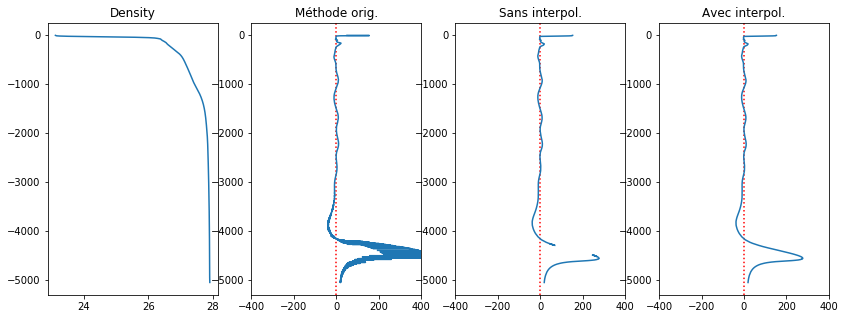

35 65


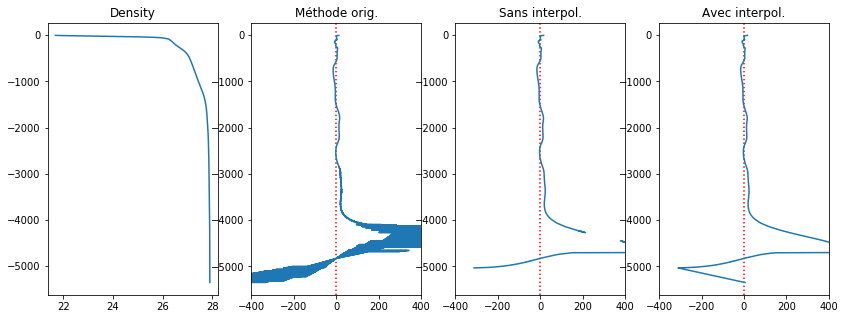

35 70


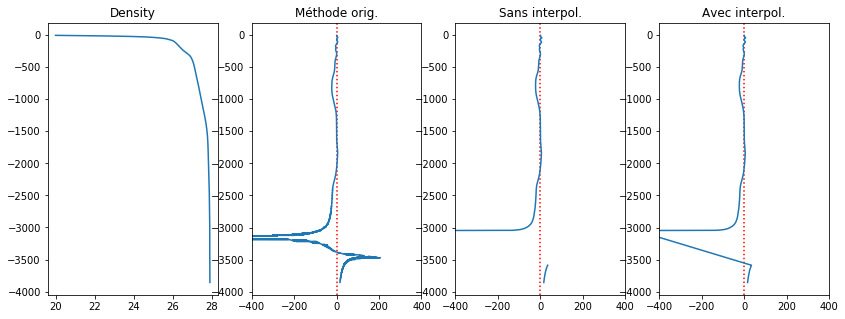

35 75
35 80
35 85
35 90
40 0
40 5
40 10
40 15


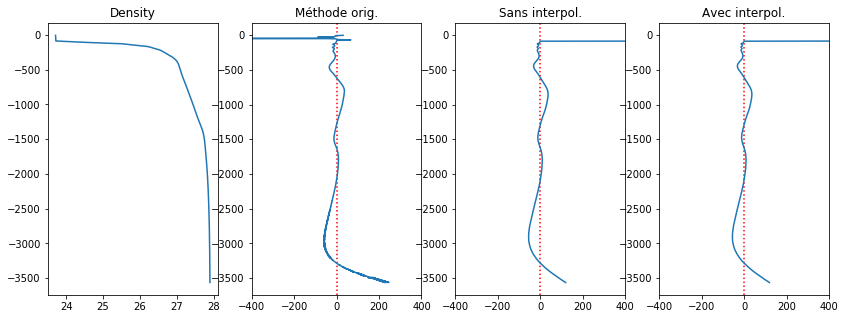

40 20


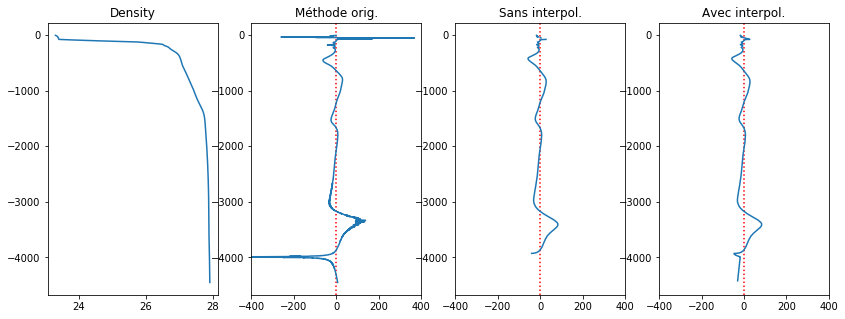

40 25


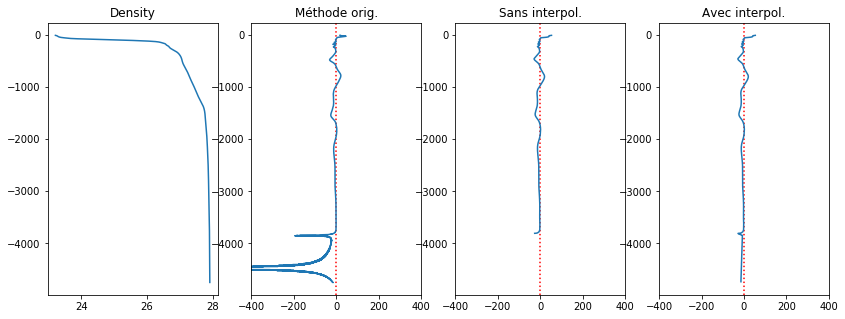

40 30


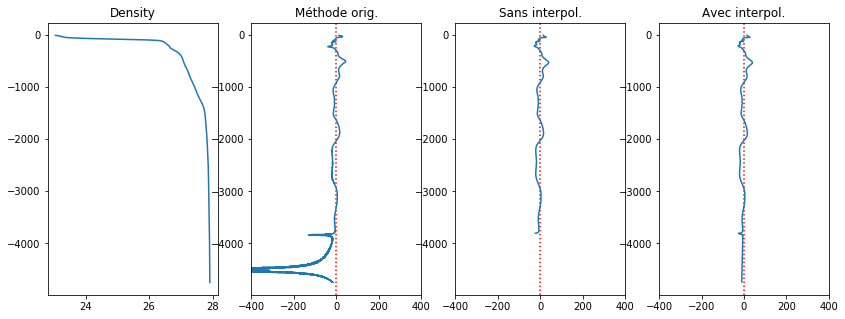

40 35


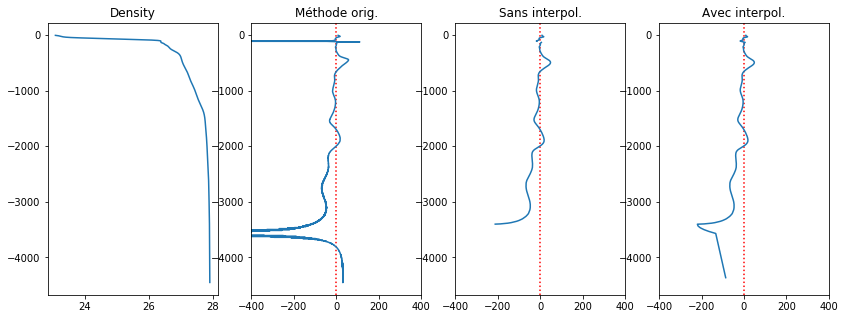

40 40


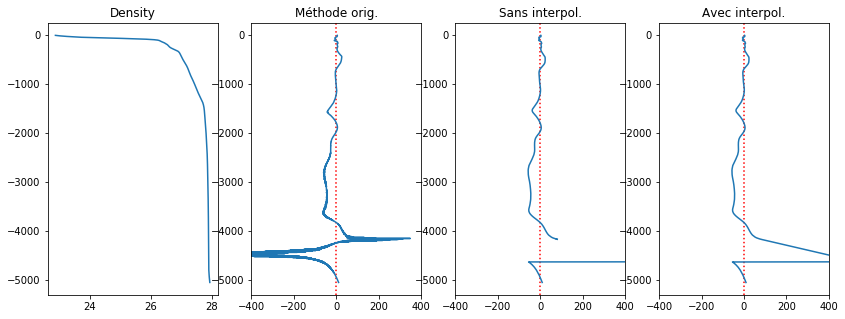

40 45


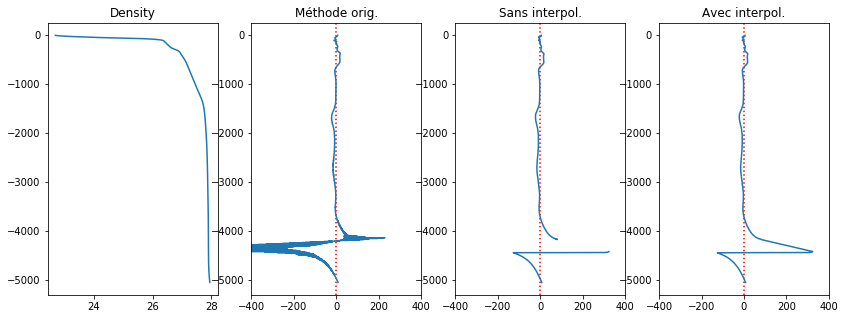

40 50


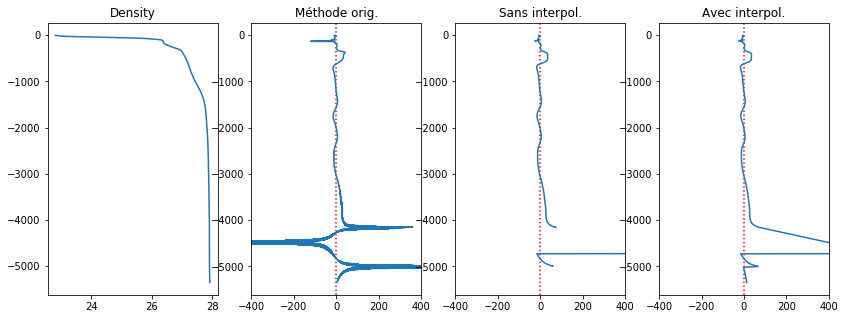

40 55


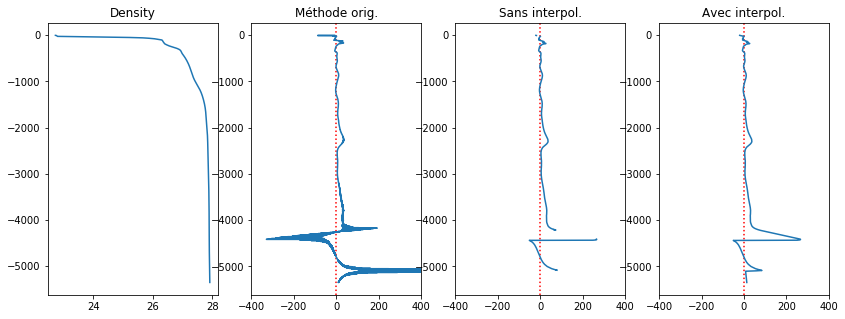

40 60


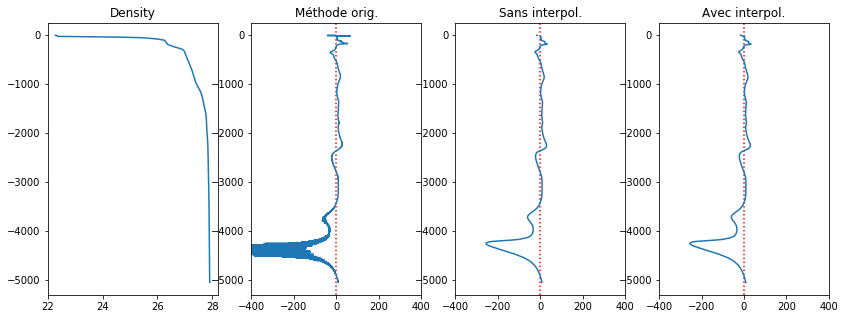

40 65


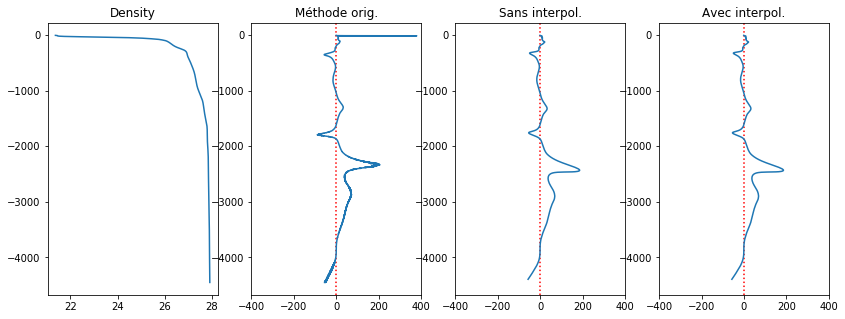

40 70
40 75
40 80
40 85
40 90
CPU times: user 2min 23s, sys: 9.01 s, total: 2min 32s
Wall time: 2min 3s


In [98]:
%%time

########################################################################
import scipy.interpolate as interp
########################################################################
grad1=np.gradient(sigma1,z,axis=0)
grad2=np.gradient(sigma2,z,axis=0)


for i in range(0,len(lat),5):
    for j in range(0,len(lon),5):

        print(i,j)

        sig1= sigma1[:,i,j]
        sig2= sigma2[:,i,j]
        
        if np.isfinite(nanmax(sig1)):

            diff=sig1-sig2            # calculate the difference between profil1 and profil2
            gradi=grad2[:,i,j]        # gradient of profil2
            data=(diff)/abs(gradi) 

            #itp_vert = interp.interp1d(sm[:,i,j],zm)
            #itp_vert = interp.InterpolatedUnivariateSpline(sm[:,i,j],zm)

            ####

            sig1=restratify(sigma1[:,i,j],-z,interpolation=False)
            sig2=restratify(sigma2[:,i,j],-z,interpolation=False)

            itp_vert = interp.interp1d(sig1,z,bounds_error=False,fill_value="extrapolate")
            data_itp1 = z- itp_vert(sig2)

            ####

            sig1=restratify(sigma1[:,i,j],-z,interpolation=True)
            sig2=restratify(sigma2[:,i,j],-z,interpolation=True)

            itp_vert = interp.interp1d(sig1,z,bounds_error=False,fill_value="extrapolate")
            data_itp2 = z - itp_vert(sig2)


            ############################################################
            #myaxis = [-500, 500, np.min(-z), 0]

            fig=figure(figsize=(14.,5.),facecolor='white', edgecolor='black')
            subplot(141)
            plot(sig2,z*-1)
            plt.title('Density')

            subplot(142)
            axvline(0,color='r',linestyle=':')
            plot(data,z*-1)
            plt.xlim([-400,400])
            myaxis = plt.axis()
            plt.title('Méthode orig.')

            subplot(143)
            axvline(0,color='r',linestyle=':')
            plot(data_itp1,z*-1)
            plt.axis(myaxis)
            plt.title('Sans interpol.')

            subplot(144)
            axvline(0,color='r',linestyle=':')
            plot(data_itp2,z*-1)
            plt.axis(myaxis)
            plt.title('Avec interpol.')

            plt.show()